# Машинное обучение для покупки коров

**Описание проекта**

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

**Цель проекта:** разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. 

**Описание данных**

1. **Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:**
    * id — уникальный идентификатор коровы.
    * Удой, кг — масса молока, которую корова даёт в год (в килограммах).
    * ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
    * Сырой протеин, г — содержание сырого протеина в корме (в граммах).
    * СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
    * Порода — порода коровы.
    * Тип пастбища — ландшафт лугов, на которых паслась корова.
    * порода папы_быка — порода папы коровы.
    * Жирность,% — содержание жиров в молоке (в процентах).
    * Белок,% — содержание белков в молоке (в процентах).
    * Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    * Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
    
2. **Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:**
    * id — уникальный идентификатор коровы.
    * Имя Папы — имя папы коровы.
    
3. **Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:**
    * Порода — порода коровы.
    * Тип пастбища — ландшафт лугов, на которых паслась корова.
    * порода папы_быка — порода папы коровы.
    * Имя_папы — имя папы коровы.
    * Текущая_жирность,% — содержание жиров в молоке (в процентах).
    * Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
    * Возраст — возраст

## Загрузка данных

In [1]:
#Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split

from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)

from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler
)

from sklearn.metrics import (
    accuracy_score,
    recall_score, 
    precision_score,  
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_error,
    r2_score    
)

In [2]:
#Загружаем данные о стаде фермера
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')

#Загружаем данные о папе коровы
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')

#Загружаем данные о стаде фермера
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

##  Предобработка данных

In [3]:
# В целях оптимизации, напишем функцию для получения общей информации о датасете
def describe_df(df, name):
    print('размер датафрейма', name, ':', df.shape)
    print('_'*125)
    
    print('Первые 5 строк датафрейма', name)
    display(df.head())
    print('_'*125)
    
    print('Последнии 5 строк датафрейма', name)
    display(df.tail())
    print('_'*125)
    
    display(df.info())
    print('_'*125)
        
    print('Описание датафрейма', name)
    display(df.describe().T)
    print('_'*125)
    
    print('Количество явных дубликатов в датафрейте', name, ':', df.duplicated().sum())
    print('Количество пропусков в датафрейте', name, ':', '\n', df.isna().sum())
    
    print('*'*125)
    

### ferma_main

In [4]:
#Вызовем функцию для датасета 'ferma_main'
describe_df(ferma_main, 'ferma_main')

размер датафрейма ferma_main : (634, 12)
_____________________________________________________________________________________________________________________________
Первые 5 строк датафрейма ferma_main


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


_____________________________________________________________________________________________________________________________
Последнии 5 строк датафрейма ferma_main


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


_____________________________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%         

None

_____________________________________________________________________________________________________________________________
Описание датафрейма ferma_main


,count,mean,std,min,25%,50%,75%,max
id,634.0,317.460568,183.096982,1.000,159.250,317.500,475.750,629.000
"Удой, кг",634.0,6187.025237,1638.401021,5204.000,5751.750,6130.500,6501.000,45616.000
ЭКЕ (Энергетическая кормовая единица),634.0,14.542744,1.301301,10.900,13.500,14.700,15.600,16.800
"Сырой протеин, г",634.0,1922.682965,182.392548,1660.000,1772.250,1880.500,2058.750,2349.000
СПО (Сахаро-протеиновое соотношение),634.0,0.912855,0.032209,0.840,0.890,0.930,0.940,0.960
"Жирность,%",634.0,3.603943,0.168020,2.990,3.590,3.650,3.720,3.750
"Белок,%",634.0,3.075666,0.002540,3.069,3.074,3.076,3.077,3.085


_____________________________________________________________________________________________________________________________
Количество явных дубликатов в датафрейте ferma_main : 5
Количество пропусков в датафрейте ferma_main : 
 id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64
*****************************************************************************************************************************


**Вывод по общей информации в датафрейте ferma_main:**
* Обнаружены явные дубликаты - будем удалять
* Название столбцов не приведены к единому стиля написания
* Типы столбцов указаны верно
* Пропущенных значений не выявленно

In [5]:
#удалим явные дубликаты в датафрейте ferma_main
ferma_main.drop_duplicates(inplace=True)
print('Количество явных дубликатов в датафрейте', ':', ferma_main.duplicated().sum())

Количество явных дубликатов в датафрейте : 0


In [6]:
#Приведем назване столбцов к единому стилю написания
ferma_main.rename(columns={
    'Удой, кг': 'milk_yield',
    'ЭКЕ (Энергетическая кормовая единица)': 'eke',
    'Сырой протеин, г': 'raw_protein',
    'СПО (Сахаро-протеиновое соотношение)': 'spo',
    'Порода': 'breed',
    'Тип пастбища': 'type_of_pasture',
    'порода папы_быка': 'dad_breed',
    'Жирность,%': 'fat_content',
    'Белок,%': 'protein',
    'Вкус молока': 'taste_of_milk',
    'Возраст': 'age',
}, inplace=True)

ferma_main.head(1)

,id,milk_yield,eke,raw_protein,spo,breed,type_of_pasture,dad_breed,fat_content,protein,taste_of_milk,age
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет


### ferma_dad

In [7]:
#Вызовем функцию для датасета 'ferma_dad'
describe_df(ferma_dad, 'ferma_dad')

размер датафрейма ferma_dad : (629, 2)
_____________________________________________________________________________________________________________________________
Первые 5 строк датафрейма ferma_dad


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


_____________________________________________________________________________________________________________________________
Последнии 5 строк датафрейма ferma_dad


,id,Имя Папы
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин
628,629,Соловчик


_____________________________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

_____________________________________________________________________________________________________________________________
Описание датафрейма ferma_dad


,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0


_____________________________________________________________________________________________________________________________
Количество явных дубликатов в датафрейте ferma_dad : 0
Количество пропусков в датафрейте ferma_dad : 
 id          0
Имя Папы    0
dtype: int64
*****************************************************************************************************************************


Вывод по общей информации в датафрейте ferma_dad:

* Явные дубликаты не обнаружены
* Название столбцов не приведены к единому стиля написания
* Типы столбцов указаны верно
* Пропущенных значений не выявленно

In [8]:
#Приведем назване столбцов к единому стилю написания
ferma_dad.rename(columns={'Имя Папы': 'dad_name'}, inplace=True)
ferma_dad.head(1)

,id,dad_name
0,1,Буйный


### cow_buy

In [9]:
#Вызовем функцию для датасета 'cow_buy'
describe_df(cow_buy, 'cow_buy')

размер датафрейма cow_buy : (20, 7)
_____________________________________________________________________________________________________________________________
Первые 5 строк датафрейма cow_buy


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


_____________________________________________________________________________________________________________________________
Последнии 5 строк датафрейма cow_buy


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


_____________________________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

_____________________________________________________________________________________________________________________________
Описание датафрейма cow_buy


,count,mean,std,min,25%,50%,75%,max
"Текущая_жирность,%",20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
"Текущий_уровень_белок,%",20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


_____________________________________________________________________________________________________________________________
Количество явных дубликатов в датафрейте cow_buy : 4
Количество пропусков в датафрейте cow_buy : 
 Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64
*****************************************************************************************************************************


Вывод по общей информации в датафрейте cow_buy:

* Обнаружены явные дубликаты - ~~будем удалять~~ Удалять их не будем, так как в датафрейте признаков, категорий немного - вероятность повторов ненулевая.
* Название столбцов не приведены к единому стиля написания
* Типы столбцов указаны верно
* Пропущенных значений не выявленно

In [11]:
cow_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'type_of_pasture',
    'порода папы_быка': 'dad_breed',
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'fat_content_now',
    'Текущий_уровень_белок,%': 'protein_now',
    'Возраст': 'age',
}, inplace=True)

cow_buy.head(1)

,breed,type_of_pasture,dad_breed,dad_name,fat_content_now,protein_now,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет


### Вывод по предобработке данных

**Вывод по предобработке данных**

**ferma_main:**

* Обнаружены и удалены явные дубликаты
* Название столбцов приведены к единому стиля написания:
    
    * 'Удой, кг' &#8594; 'milk_yield',
    * 'ЭКЕ (Энергетическая кормовая единица)' &#8594; 'eke',
    * 'Сырой протеин, г' &#8594; 'raw_protein',
    * 'СПО (Сахаро-протеиновое соотношение) '&#8594; 'spo',
    * 'Порода' &#8594; 'breed',
    * 'Тип пастбища' &#8594; 'type_of_pasture',
    * 'порода папы_быка' &#8594; 'dad_breed',
    * 'Жирность,%' &#8594; 'fat_content',
    * 'Белок,%' &#8594; 'protein',
    * 'Вкус молока' &#8594; 'taste_of_milk',
    * 'Возраст' &#8594; 'age',
* Типы столбцов указаны верно
* Пропущенных значений не выявленно
    
**ferma_dad**

* Явные дубликаты не обнаружены
* Название столбцов приведены к единому стиля написания:
    * 'Имя Папы' &#8594; 'dad_name'
* Типы столбцов указаны верно
* Пропущенных значений не выявленно

**cow_buy**

* Обнаружены явные дубликаты - Удалять их не будем, так как в датафрейте признаков, категорий немного - вероятность повторов ненулевая.
* Название столбцов не приведены к единому стиля написания
    * 'Порода' &#8594; 'breed',
    * 'Тип пастбища' &#8594; 'type_of_pasture',
    * 'порода папы_быка' &#8594; 'dad_breed',
    * 'Имя_папы' &#8594; 'dad_name',
    * 'Текущая_жирность,%' &#8594; 'fat_content_now',
    * 'Текущий_уровень_белок,%' &#8594; 'protein_now',
    * 'Возраст' &#8594; 'age',
* Типы столбцов указаны верно
* Пропущенных значений не выявленно

## Исследовательский анализ данных

In [12]:
# В целях оптимизации, напишем функцию для получения общей информации о столбце
def describe_column(df, column):
    print('Количество строк',  ':', df[column].shape[0])
    print('_'*125)
        
    print('Описание данных')
    display(df[column].describe().T)
    print('_'*125)
    
    print('Количество уникальных значений:', df[column].unique().shape[0])
    print('Количество пропусков в датафрейте', df[column].isna().sum())
    print('_'*125)
    
    if type(df[column].loc[1]) == str:
        print('Уникальные значения')
        print(df[column].value_counts())
    
    print('*'*125)
    

In [13]:
# Напишем функцию построения гистограммы и диграммы размаха для количественных данных
def hix_box_plot(df, column):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    fig.suptitle(f'Обзор данных {column}', fontsize = 20, fontweight='bold')
    
    df[column].plot(ax=ax[0], kind='hist')
     
    sns.boxplot(df[column], ax=ax[1])
    
    ax[0].set_title('Гистограмма')
    ax[0].set_xlabel(column)
    
    ax[1].set_title('Диграмма размаха')
    ax[1].set_xlabel(column)
    

In [14]:
# Напишем функцию построения графика для категориальных данных

def bar_pie_plot(df, column):

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    fig.suptitle(f'Обзор данных {column}', fontsize = 20, fontweight='bold')
    
    df.groupby(column)[column].count().plot(ax=ax[0], kind='bar')
    
    df.groupby(column)[column].count().plot(ax=ax[1], kind='pie', autopct='%1.0f%%')
    
        
    ax[0].set_title(f'Количественная диограмма')
    ax[1].set_title(f'Круговая диограмма')
    
    
    ax[0].tick_params(axis='x', labelrotation=0, labelsize = 15) 

### ferma_main

#### 'milk_yield' - Удой, кг

In [15]:
#Выведем общую информацую
describe_column(ferma_main,'milk_yield')

Количество строк : 629
_____________________________________________________________________________________________________________________________
Описание данных


count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield, dtype: float64

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 528
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
*****************************************************************************************************************************


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


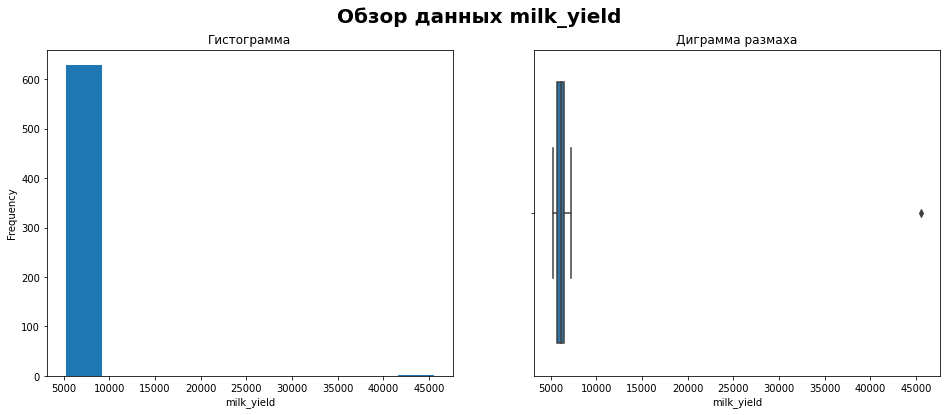

In [16]:
#Построим графики
hix_box_plot(ferma_main,'milk_yield')

На графиках видим, что есть аномальное значение, отсортируем данные по удою и выведем последнии 5 записей

In [17]:
ferma_main.sort_values(by='milk_yield').tail()

,id,milk_yield,eke,raw_protein,spo,breed,type_of_pasture,dad_breed,fat_content,protein,taste_of_milk,age
294,295,7197,15.6,2241,0.94,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.075,вкусно,более_2_лет
296,297,7201,15.8,2077,0.94,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.072,вкусно,более_2_лет
135,136,7207,16.6,2343,0.94,Вис Бик Айдиал,Холмистое,Айдиал,3.72,3.078,вкусно,более_2_лет
70,71,7222,16.8,2157,0.95,Вис Бик Айдиал,Холмистое,Айдиалл,3.70,3.076,вкусно,более_2_лет
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет


Видим, что строка с аномальным значением всего одна, при этом остальные данные того же порядка, что и у предыдущих данных, значит имеем дело с выбросом, избавимся от него. 

In [18]:
#Удалим анамальное значение
ferma_main = ferma_main[ferma_main['milk_yield'] < 8000]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


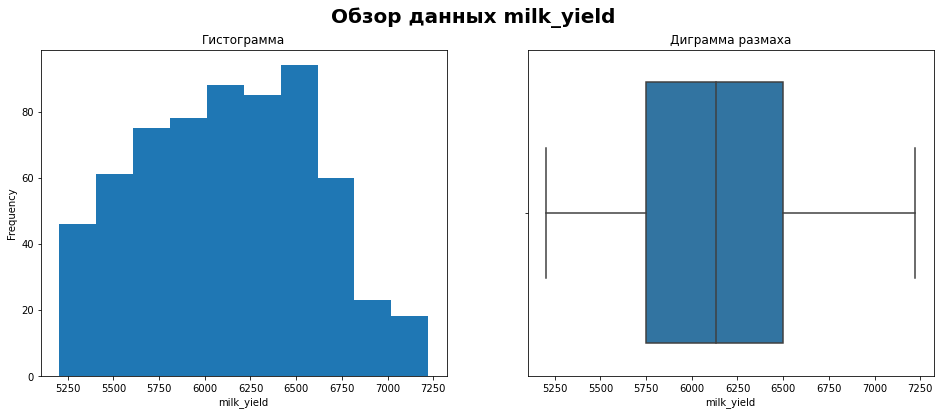

In [19]:
#Построим занаво наши графики
hix_box_plot(ferma_main,'milk_yield')

После удаления аномального значения, видим, что данные варьируются в пределах от 5750 до 6500 кг. удоя. Распределение напоминает нормальное

**Вывод** В столбце 'milk_yield' - удой,  масса молока, которую корова даёт в год (в килограммах). удалили анамальное значение. 

После удаления аномального значения, распределение данных стало напоминать нормальное и данные варьируются в пределах от 5750 до 6500 кг. молока в год.


#### eke - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.

In [20]:
#Выведем общую информацую
describe_column(ferma_main,'eke')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: eke, dtype: float64

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 54
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
*****************************************************************************************************************************


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


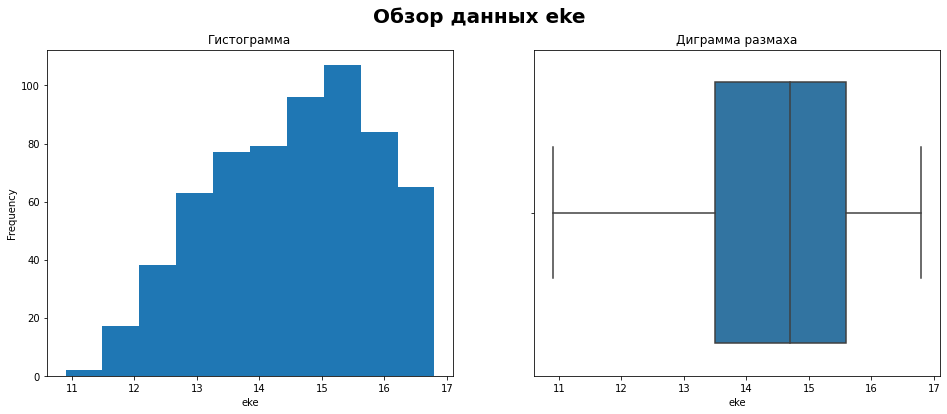

In [21]:
#Построим графики
hix_box_plot(ferma_main,'eke')

**Вывод** В столбце eke - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы. Данные распределены нормально, ассиметрично. Аномальных значений нет. Средний показатель питательности корма коровы варьируется от 13,5 до 15,5.

#### raw_protein - Сырой протеин, г — содержание сырого протеина в корме (в граммах).

In [22]:
#Выведем общую информацую
describe_column(ferma_main,'raw_protein')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein, dtype: float64

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 401
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
*****************************************************************************************************************************


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


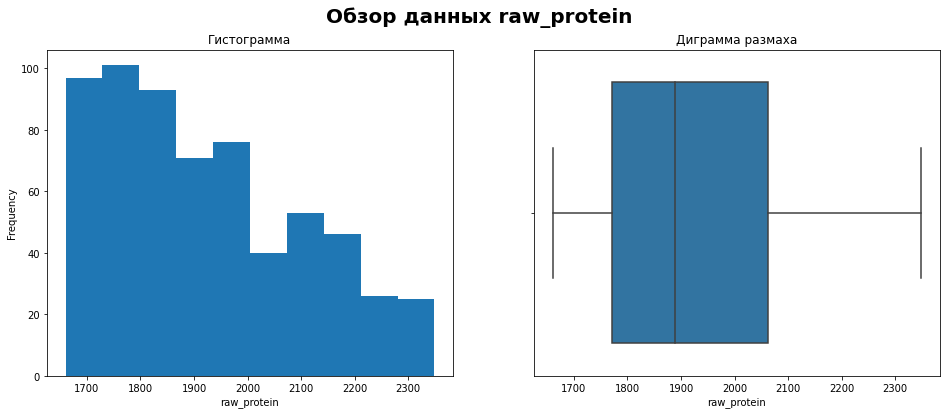

In [23]:
#Построим графики
hix_box_plot(ferma_main,'raw_protein')

**Вывод** В столбце raw_protein - Сырой протеин, г — содержание сырого протеина в корме (в граммах). Данные распределены нормально, ассиметрично. Аномальных значений нет. Средний показатель содержание сырого протеина в корме варьируется от 1780 до 2070.

#### spo - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.

In [24]:
#Выведем общую информацую
describe_column(ferma_main,'spo')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spo, dtype: float64

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 12
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
*****************************************************************************************************************************


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


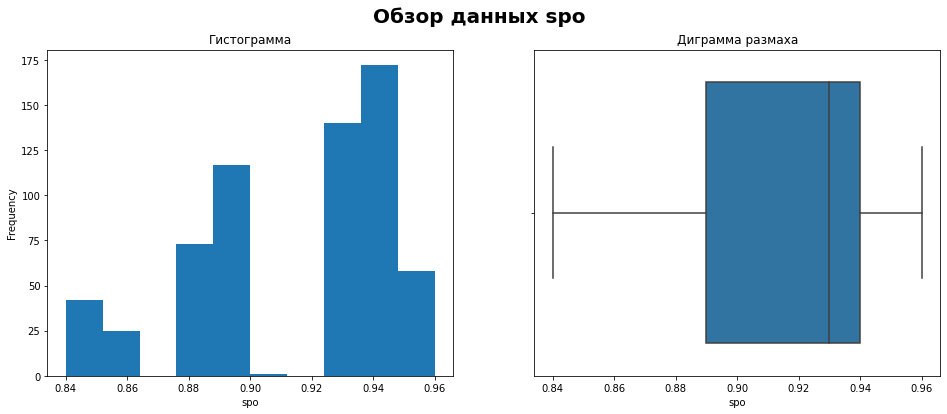

In [25]:
#Построим графики
hix_box_plot(ferma_main,'spo')

**Вывод** В столбце spo - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы. В данных есть пропуски данных, возможно это связано со спецификой вычисления признака СПО. Аномальных значений нет. Средний показатель сотношения сахара к протеину в корме коровы варьируется от 0,89 до 0,94.

#### breed - Порода — порода коровы.

In [26]:
#Выведем общую информацую
describe_column(ferma_main,'breed')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count                628
unique                 2
top       Вис Бик Айдиал
freq                 372
Name: breed, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 2
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
Вис Бик Айдиал     372
РефлешнСоверинг    256
Name: breed, dtype: int64
*****************************************************************************************************************************


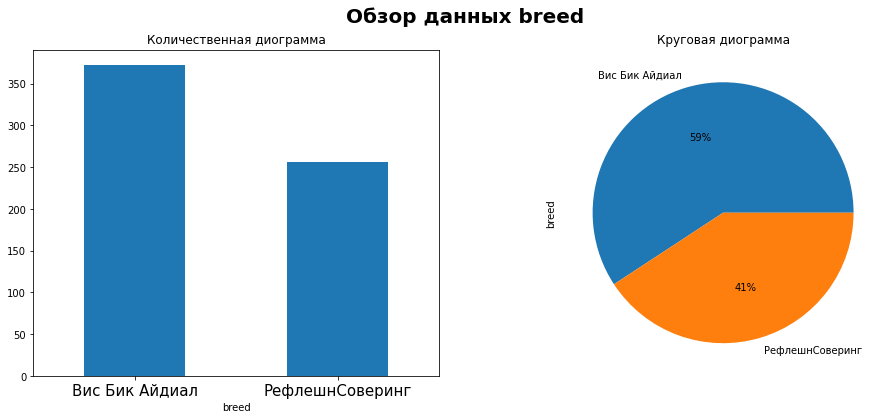

In [27]:
bar_pie_plot(ferma_main, 'breed')

**Вывод** В столбце breed - Порода — порода коровы. Представленны коровы двух видов: Вис Бик Айдиал в количестве 372 шт (59%), и РефлешнСоверинг в количестве 256 штук (41%). 

#### type_of_pasture - Тип пастбища — ландшафт лугов, на которых паслась корова.

In [28]:
#Выведем общую информацую
describe_column(ferma_main,'type_of_pasture')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count           628
unique            3
top       Холмистое
freq            350
Name: type_of_pasture, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 3
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
Холмистое    350
Равнинное    253
Равнинные     25
Name: type_of_pasture, dtype: int64
*****************************************************************************************************************************


Видим, что в столбце всего 3 уникальных значения. Причем Равнинное и Равнинные - являются дубликатами.

In [29]:
#Заменим Равнинные на Равнинное
ferma_main['type_of_pasture'] = ferma_main['type_of_pasture'].replace('Равнинные', 'Равнинное')

In [30]:
#Выведем общую информацую
describe_column(ferma_main,'type_of_pasture')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count           628
unique            2
top       Холмистое
freq            350
Name: type_of_pasture, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 2
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
Холмистое    350
Равнинное    278
Name: type_of_pasture, dtype: int64
*****************************************************************************************************************************


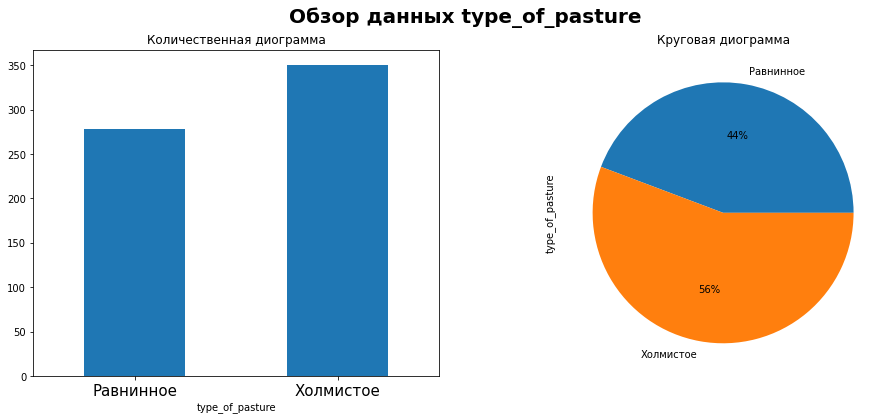

In [31]:
#Построим графики
bar_pie_plot(ferma_main, 'type_of_pasture')

**Вывод** В столбце type_of_pasture - Тип пастбища — ландшафт лугов, на которых паслась корова. Обработали неявные дубликаты, заменили Равнинные на Равнинное. После замены осталось два типа ландшафта. На Холмистой местности пасутся 350 коров (56%), на равнинной 278 коровы (44%)

#### dad_breed - порода папы_быка — порода папы коровы.

In [32]:
#Выведем общую информацую
describe_column(ferma_main,'dad_breed')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count         628
unique          3
top       Соверин
freq          311
Name: dad_breed, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 3
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
Соверин    311
Айдиал     240
Айдиалл     77
Name: dad_breed, dtype: int64
*****************************************************************************************************************************


Видим, что в столбце всего 3 уникальных значения. Причем Айдиал и Айдиалл - являются дубликатами.

In [33]:
#Заменим Айдиалл на Айдиал
ferma_main['dad_breed'] = ferma_main['dad_breed'].replace('Айдиалл', 'Айдиал')

In [34]:
#Выведем общую информацую
describe_column(ferma_main,'dad_breed')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count        628
unique         2
top       Айдиал
freq         317
Name: dad_breed, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 2
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
Айдиал     317
Соверин    311
Name: dad_breed, dtype: int64
*****************************************************************************************************************************


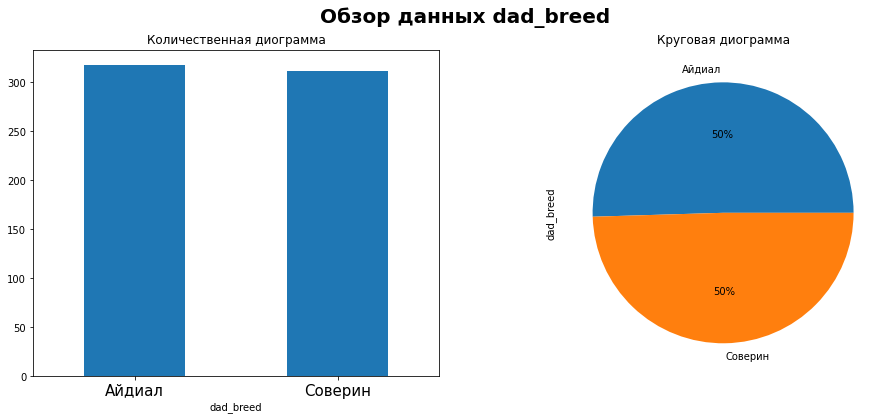

In [35]:
#Построим графики
bar_pie_plot(ferma_main, 'dad_breed')

**Вывод** В столбце dad_breed - порода папы_быка — порода папы коровы. Обработали неявные дубликаты, заменили Айдиалл на Айдиал. После замены осталось два вида пододы быков. Айдиал - 317 штук и Соверин - 311 штук. Распределение быков близко к 1:1.

#### fat_content - Жирность,% — содержание жиров в молоке (в процентах).

In [36]:
#Выведем общую информацую
describe_column(ferma_main,'fat_content')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 50
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
*****************************************************************************************************************************


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


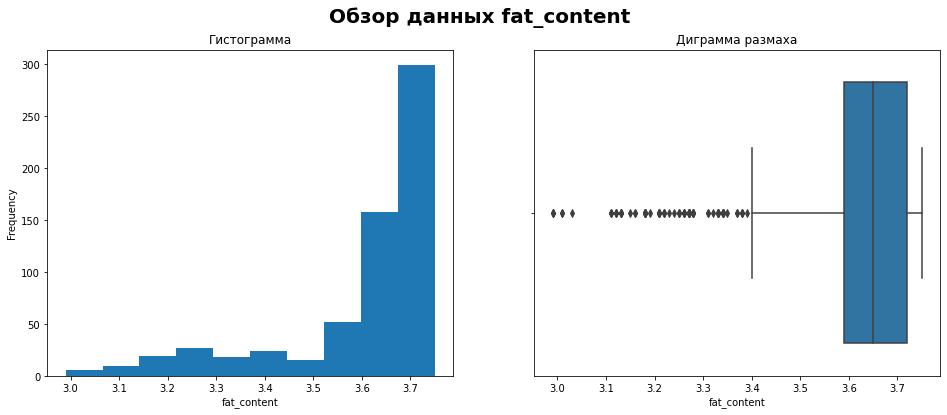

In [37]:
#Построим графики
hix_box_plot(ferma_main,'fat_content')

Из графиков видим, что у нас есть выбросы (жирность менее 3,4%). Определим процент этих выбросов

In [38]:
#Процент выбросов
print('Доля выбросов, составляет:', ferma_main[ferma_main['fat_content'] < 3.4].shape[0]/ferma_main.shape[0])

Доля выбросов, составляет: 0.13694267515923567


13.7% от общего количества данных достаточно большой объем информации, просто так избавиться от них не получится. 

**Вывод** В столбце fat_content - Жирность,% — содержание жиров в молоке (в процентах). Есть выбросы (жирность менее 3,4%). Так как доля выбросов составляет 13,7% от общего количества данных, к томуже данные реалистичны, избавится от них не будем. Средний показатель содержание жиров в молоке варьируется от 3,6% до 3,7%.


#### protein - Белок,% — содержание белков в молоке (в процентах).

In [39]:
#Выведем общую информацую
describe_column(ferma_main,'protein')

Количество строк : 628
_____________________________________________________________________________________________________________________________
Описание данных


count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 15
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
*****************************************************************************************************************************


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


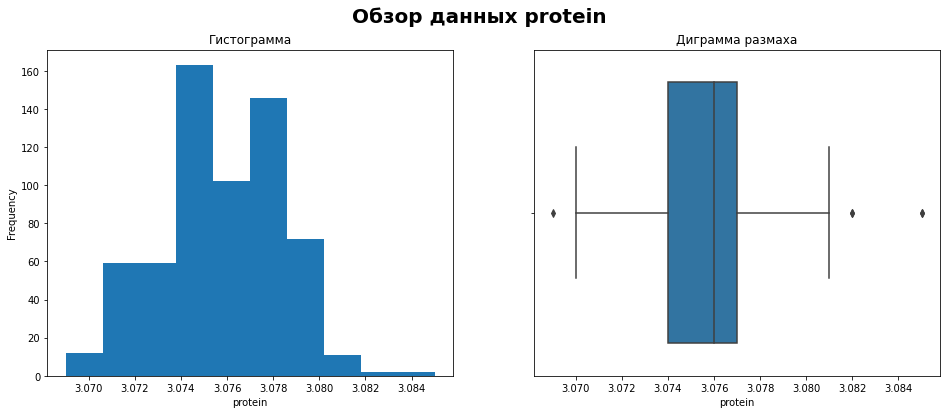

In [40]:
#Построим графики
hix_box_plot(ferma_main,'protein')

In [41]:
#На графиках видим выбросы, выведем информацию о них
ferma_main[(ferma_main['protein'] < 3.07) | (ferma_main['protein'] > 3.081)].sort_values(by='protein')

,id,milk_yield,eke,raw_protein,spo,breed,type_of_pasture,dad_breed,fat_content,protein,taste_of_milk,age
240,241,5568,13.4,1733,0.880,Вис Бик Айдиал,Равнинное,Соверин,3.63,3.069,не вкусно,менее_2_лет
77,78,5871,14.7,1795,0.895,Вис Бик Айдиал,Равнинное,Айдиал,3.61,3.082,вкусно,более_2_лет
426,427,6701,15.7,2068,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.082,вкусно,более_2_лет
471,472,5883,14.9,2159,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.62,3.085,вкусно,более_2_лет
517,518,5819,13.7,1968,0.840,Вис Бик Айдиал,Холмистое,Айдиал,3.15,3.085,вкусно,более_2_лет


In [42]:
#Процент выбросов
print('Доля выбросов, составляет:', ferma_main[(ferma_main['protein'] < 3.07) | (ferma_main['protein'] > 3.081)].shape[0]/ferma_main.shape[0])

Доля выбросов, составляет: 0.007961783439490446


Так как доля выбросов менее 1%, удалим их из датасета

In [43]:
#Удалим выбросы
ferma_main = ferma_main[(ferma_main['protein'] >= 3.07) & (ferma_main['protein'] <= 3.081)]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


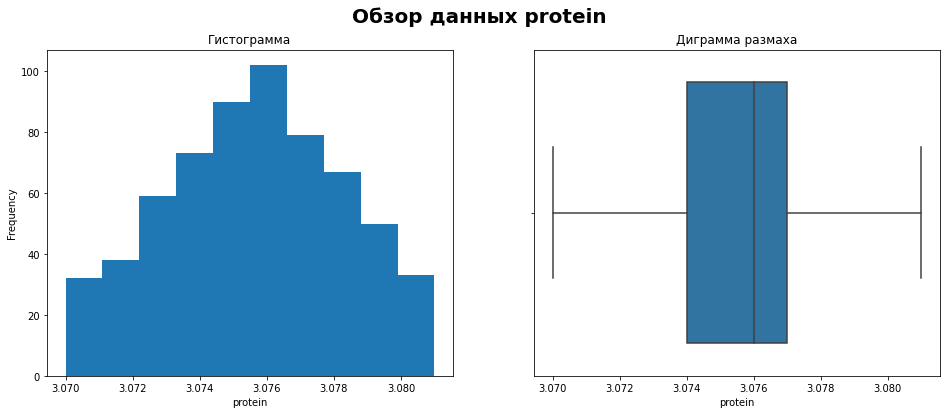

In [44]:
#Построим графики
hix_box_plot(ferma_main,'protein')

**Вывод** В столбце protein - Белок,% — содержание белков в молоке (в процентах). Удалены выбросы, где содержание белков  в молоке менее 3,07% или более 3,081%. Оставшиеся данные распределены нормально. Средний показатель содержания белков в молоке варьируется от 3,074% до 3,077%.


#### taste_of_milk - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).

In [45]:
#Выведем общую информацую
describe_column(ferma_main,'taste_of_milk')

Количество строк : 623
_____________________________________________________________________________________________________________________________
Описание данных


count        623
unique         2
top       вкусно
freq         366
Name: taste_of_milk, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 2
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
вкусно       366
не вкусно    257
Name: taste_of_milk, dtype: int64
*****************************************************************************************************************************


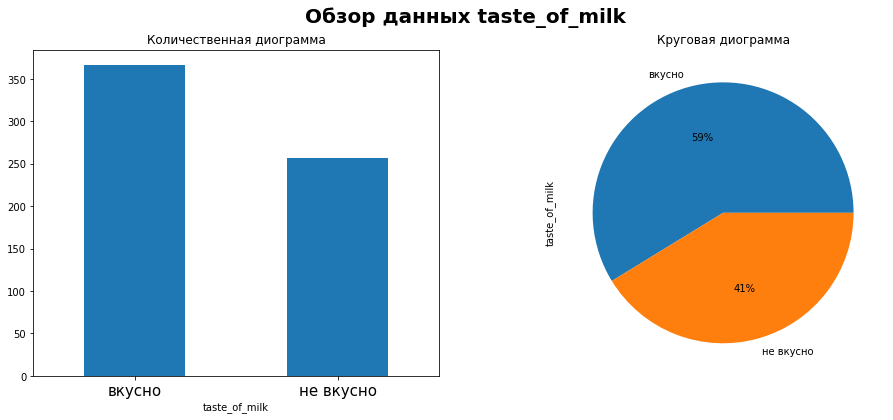

In [46]:
#Построим графики
bar_pie_plot(ferma_main, 'taste_of_milk')

**Вывод** В столбце taste_of_milk - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно) два критерия вкуса молока: вкусно - 366 значений (59%) и не вкусно (41%)

#### age Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [47]:
#Выведем общую информацую
describe_column(ferma_main,'age')

Количество строк : 623
_____________________________________________________________________________________________________________________________
Описание данных


count             623
unique              2
top       более_2_лет
freq              514
Name: age, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 2
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
более_2_лет    514
менее_2_лет    109
Name: age, dtype: int64
*****************************************************************************************************************************


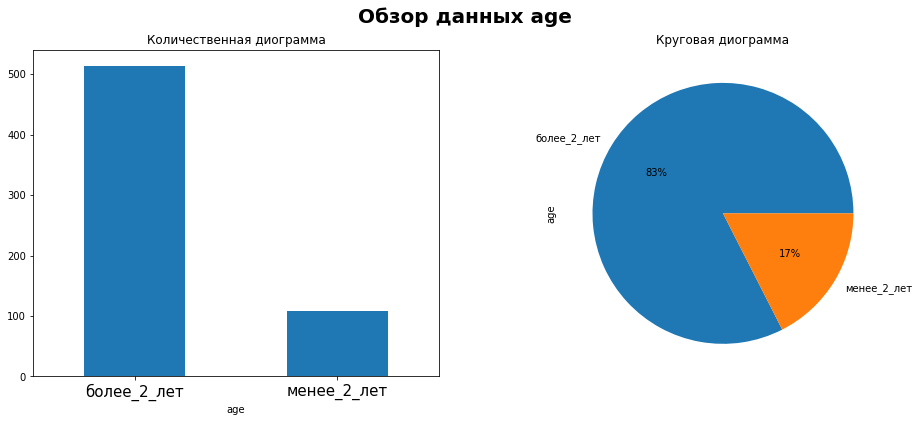

In [48]:
#Построим графики
bar_pie_plot(ferma_main, 'age')

**Вывод** В столбце age Возраст — возраст коровы, бинарный признак (менее2лет, более2лет). Молодых коров (младше 2 лет) всего 17% (109 штук), коров постарше (более 2 лет) - 83% (514 штук)

После всех изменений в таблице убедимся, что не появились новые строки дуюликаты

In [49]:
print('Количество явных дубликатов в датафрейте', ferma_main.duplicated().sum())


Количество явных дубликатов в датафрейте 0


#### Вывод по таблице ferma_main

В столбце **'milk_yield' - удой, масса молока, которую корова даёт в год (в килограммах).** удалили анамальное значение. После удаления аномального значения, распределение данных стало напоминать нормальное и данные варьируются в пределах от 5750 до 6500 кг. молока в год.

В столбце **eke - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.** Данные распределены нормально, ассиметрично. Аномальных значений нет. Средний показатель питательности корма коровы варьируется от 13,5 до 15,5.

В столбце **raw_protein - Сырой протеин, г — содержание сырого протеина в корме (в граммах).** Данные распределены нормально, ассиметрично. Аномальных значений нет. Средний показатель содержание сырого протеина в корме варьируется от 1780 до 2070.

В столбце **spo - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.** В столбце spo - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы. В данных есть пропуски данных, возможно это связано со спецификой вычисления признака СПО. Аномальных значений нет. Средний показатель сотношения сахара к протеину в корме коровы варьируется от 0,89 до 0,94.

В столбце **breed - Порода — порода коровы.** Представленны коровы двух видов: Вис Бик Айдиал в количестве 372 шт (59%), и РефлешнСоверинг в количестве 256 штук (41%).

В столбце **type_of_pasture - Тип пастбища — ландшафт лугов, на которых паслась корова.** Обработали неявные дубликаты, заменили Равнинные на Равнинное. После замены осталось два типа ландшафта. На Холмистой местности пасутся 350 коров (56%), на равнинной 278 коровы (44%)

В столбце **dad_breed - порода папы_быка — порода папы коровы.** Обработали неявные дубликаты, заменили Айдиалл на Айдиал. После замены осталось два вида пододы быков. Айдиал - 317 штук и Соверин - 311 штук. Распределение быков близко к 1:1.

В столбце **fat_content - Жирность,%** — содержание жиров в молоке (в процентах). Есть выбросы (жирность менее 3,4%). Так как доля выбросов составляет 13,7% от общего количества данных, к томуже данные реалистичны, избавится от них не будем. Средний показатель содержание жиров в молоке варьируется от 3,6% до 3,7%.


В столбце **protein - Белок,% — содержание белков в молоке (в процентах).** Удалены выбросы, где содержание белков в молоке менее 3,07% или более 3,081%. Оставшиеся данные распределены нормально. Средний показатель содержания белков в молоке варьируется от 3,074% до 3,077%.

В столбце **taste_of_milk - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно)** два критерия вкуса молока: вкусно - 366 значений (59%) и не вкусно (41%)

В столбце **age Возраст — возраст коровы, бинарный признак (менее2лет, более2лет).** Молодых коров (младше 2 лет) всего 17% (109 штук), коров постарше (более 2 лет) - 83% (514 штук)

### ferma_dad

In [50]:
#Выведем общую информацую
describe_column(ferma_dad,'dad_name')

Количество строк : 629
_____________________________________________________________________________________________________________________________
Описание данных


count       629
unique        4
top       Барин
freq        240
Name: dad_name, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 4
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: dad_name, dtype: int64
*****************************************************************************************************************************


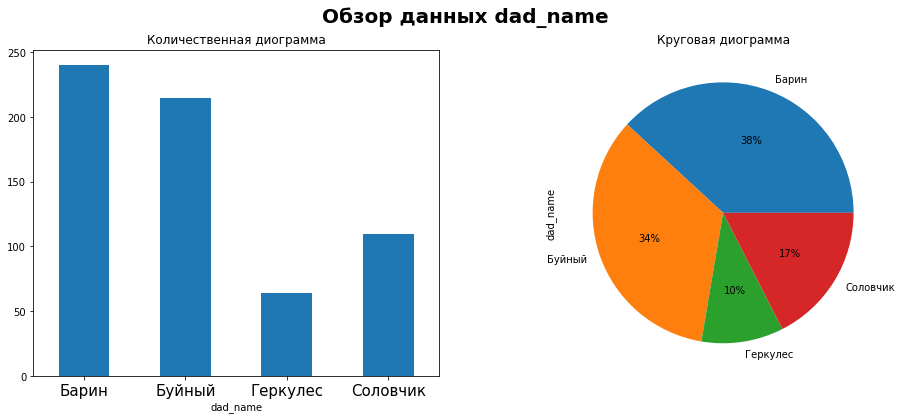

In [51]:
#Построим графики
bar_pie_plot(ferma_dad, 'dad_name')

**Вывод по таблице ferma_dad** Главный бык осеменитель Барин на его счету 240 коров, на втором месте Буйный - 215 коров, замыкают рейтинг Соловчик и Геркулес 110 и 64 коровы соответственно. 

### cow_buy

#### breed - Порода — порода коровы.

In [52]:
#Выведем общую информацую
describe_column(cow_buy,'breed')

Количество строк : 20
_____________________________________________________________________________________________________________________________
Описание данных


count                  20
unique                  2
top       РефлешнСоверинг
freq                   11
Name: breed, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 2
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: breed, dtype: int64
*****************************************************************************************************************************


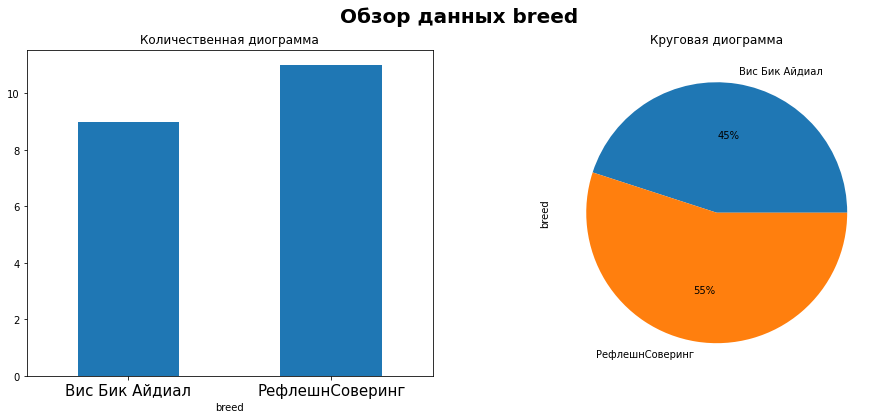

In [53]:
#Построим графики
bar_pie_plot(cow_buy, 'breed')

**Вывод** В столбце breed - Порода — порода коровы. Коровы которые рассматривает фермер для покупки принадлежат породам Вис Бик Айдиал и РефлешнСоверинг. Причем предпочтений относительно породы у фермера нет, так как в списке их одинаковое количество.

#### type_of_pasture - Тип пастбища — ландшафт лугов, на которых паслась корова.

In [54]:
#Выведем общую информацую
describe_column(cow_buy,'type_of_pasture')

Количество строк : 20
_____________________________________________________________________________________________________________________________
Описание данных


count            20
unique            2
top       равнинное
freq             11
Name: type_of_pasture, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 2
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
равнинное    11
холмистое     9
Name: type_of_pasture, dtype: int64
*****************************************************************************************************************************


**Вывод** В столбце type_of_pasture - Тип пастбища — ландшафт лугов, на которых паслась корова. Два уникальных значения равнинное и холмистое. Причем соотношение данных 1:1.

#### dad_breed - порода папы_быка — порода папы коровы.

In [55]:
#Выведем общую информацую
describe_column(cow_buy,'dad_name')

Количество строк : 20
_____________________________________________________________________________________________________________________________
Описание данных


count         20
unique         4
top       Буйный
freq           8
Name: dad_name, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 4
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: dad_name, dtype: int64
*****************************************************************************************************************************


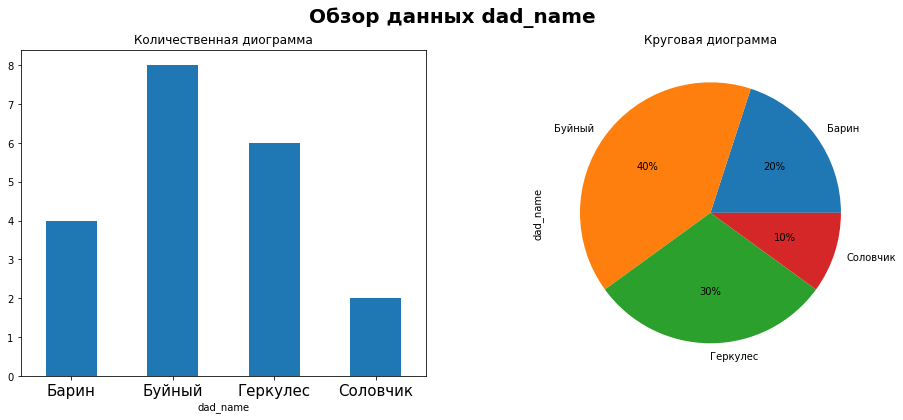

In [56]:
#Построим графики
bar_pie_plot(cow_buy, 'dad_name')

**Вывод** В столбце dad_breed - порода папы_быка — порода папы коровы. Самым распространенным отцом является Буйный, что вполне логично, так как он в лидерах по количеству детей. Логично бы предположить, что бык с наибольшим числом потомства должен лидировать и в этой выборке, но Барин оказался на последнем месте, это возможно в двух случаях, если барин уже стар и не может производить потомство в том объеме, что производил раньше, либо его детей очень быстро раскупают и до нашего фермера осталось всего 2 коровы. А Геркулес с наименьшим числом потомства вырвался на второе место с 5 детьми. Тут тоже может быть 2 исхода, либо его потомство не пользуется популярностью, либо он еще очень молод, и сейчас находится в своей лучшей форме, что его часто спаривают с другими коровами, поэтому количество его детей будет только расти.   


#### fat_content_now - Текущая_жирность,% — содержание жиров в молоке (в процентах).

In [57]:
#Выведем общую информацую
describe_column(cow_buy,'fat_content_now')

Количество строк : 20
_____________________________________________________________________________________________________________________________
Описание данных


count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: fat_content_now, dtype: float64

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 12
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
*****************************************************************************************************************************


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


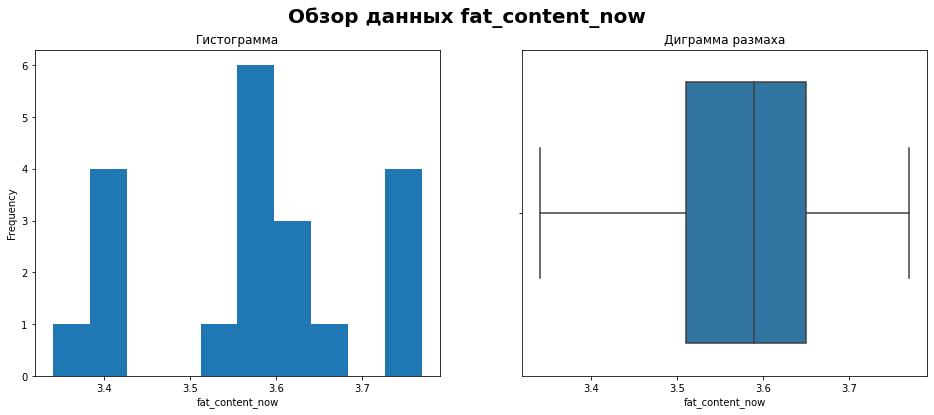

In [58]:
#Построим графики
hix_box_plot(cow_buy,'fat_content_now')

**Вывод** В столбце fat_content_now - Текущая_жирность,% — содержание жиров в молоке (в процентах). Аномальных значений (выбросов) нет. Текущая жирность молока варьируется от 3,34% до 3,77%

#### protein_now - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).

In [59]:
#Выведем общую информацую
describe_column(cow_buy,'protein_now')

Количество строк : 20
_____________________________________________________________________________________________________________________________
Описание данных


count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: protein_now, dtype: float64

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 12
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
*****************************************************************************************************************************


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


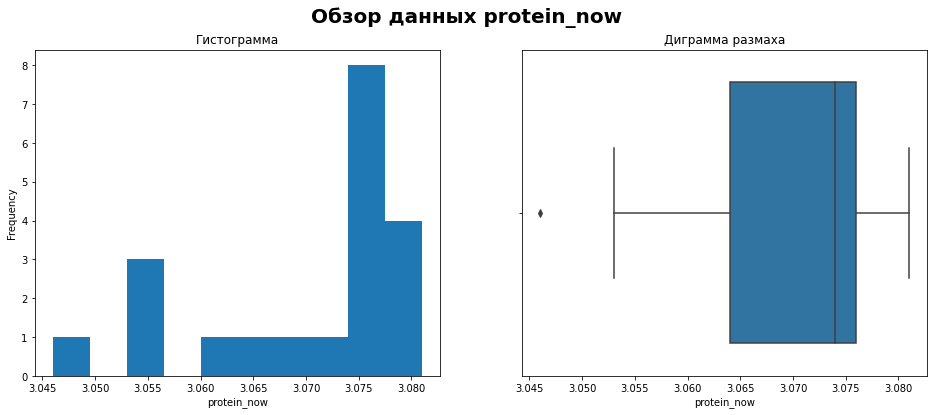

In [60]:
#Построим графики
hix_box_plot(cow_buy,'protein_now')

**Вывод** В столбце protein_now - Текущий_уровень_белок,% — содержание белков в молоке (в процентах). Аномальных значений (выбросов) нет. Распределение данных нельзя назвать нормальным, так как есть пропуски, возможно это связано со спецификой вычисления содержание белков в молоке, либо потому, что данных недостаточно, что бы заполнить все значения. Текущее содержание белков в молоке варьируется от 3,046% до 3,081%

#### age - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [61]:
#Выведем общую информацую
describe_column(cow_buy,'age')

Количество строк : 20
_____________________________________________________________________________________________________________________________
Описание данных


count              20
unique              2
top       более_2_лет
freq               15
Name: age, dtype: object

_____________________________________________________________________________________________________________________________
Количество уникальных значений: 2
Количество пропусков в датафрейте 0
_____________________________________________________________________________________________________________________________
Уникальные значения
более_2_лет    15
менее_2_лет     5
Name: age, dtype: int64
*****************************************************************************************************************************


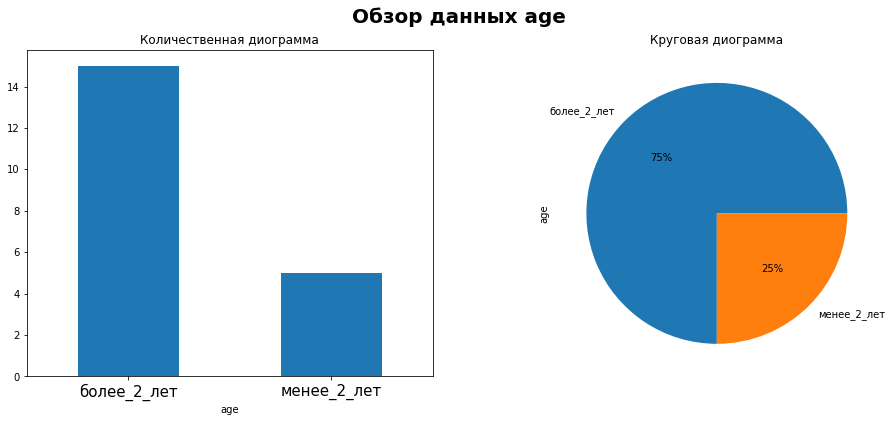

In [62]:
#Построим графики
bar_pie_plot(cow_buy, 'age')

**Вывод** В столбце age - Возраст — возраст коровы, бинарный признак (менее2лет, более2лет) всего два значения более 2 лет и менее 2 лет. Коровы, которых подобрал фермер для покупки в основном старше 2 лет (69% от всех данных). Возможно это связано с тем, что взрослые коровы дают больше молока, либо с тем, что молодых коров быстро раскупают.

#### Вывод по таблице cow_buy

В столбце **breed - Порода — порода коровы.** Коровы которые рассматривает фермер для покупки принадлежат породам Вис Бик Айдиал и РефлешнСоверинг. Причем предпочтений относительно породы у фермера нет, так как в списке их одинаковое количество.

В столбце **dad_breed - порода папы_быка — порода папы коровы.** Самым распространенным отцом является Буйный, что вполне логично, так как он в лидерах по количеству детей. Логично бы предположить, что бык с наибольшим числом потомства должен лидировать и в этой выборке, но Барин оказался на последнем месте, это возможно в двух случаях, если барин уже стар и не может производить потомство в том объеме, что производил раньше, либо его детей очень быстро раскупают и до нашего фермера осталось всего 2 коровы. А Геркулес с наименьшим числом потомства вырвался на второе место с 5 детьми. Тут тоже может быть 2 исхода, либо его потомство не пользуется популярностью, либо он еще очень молод, и сейчас находится в своей лучшей форме, что его часто спаривают с другими коровами, поэтому количество его детей будет только расти.

В столбце **fat_content_now - Текущая_жирность,% — содержание жиров в молоке (в процентах).** Аномальных значений (выбросов) нет. Текущая жирность молока варьируется от 3,34% до 3,77%

В столбце **protein_now - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).** Аномальных значений (выбросов) нет. Распределение данных нельзя назвать нормальным, так как есть пропуски, возможно это связано со спецификой вычисления содержание белков в молоке, либо потому, что данных недостаточно, что бы заполнить все значения. Текущее содержание белков в молоке варьируется от 3,046% до 3,081%

В столбце **age - Возраст — возраст коровы, бинарный признак (менее2лет, более2лет) всего два значения более 2 лет и менее 2 лет.** Коровы, которых подобрал фермер для покупки в основном старше 2 лет (69% от всех данных). Возможно это связано с тем, что взрослые коровы дают больше молока, либо с тем, что молодых коров быстро раскупают.

### Общий вывод по исследованию данных

**Таблица ferma_main, которая содержит данные о стаде фермера на текущий момент.**

- В столбце 'milk_yield' - удой, масса молока, которую корова даёт в год (в килограммах). удалили анамальное значение. После удаления аномального значения, распределение данных стало напоминать нормальное и данные варьируются в пределах от 5750 до 6500 кг. молока в год.

- В столбце eke - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы. Данные распределены нормально, ассиметрично. Аномальных значений нет. Средний показатель питательности корма коровы варьируется от 13,5 до 15,5.

- В столбце raw_protein - Сырой протеин, г — содержание сырого протеина в корме (в граммах). Данные распределены нормально, ассиметрично. Аномальных значений нет. Средний показатель содержание сырого протеина в корме варьируется от 1780 до 2070.

- В столбце spo - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы. В данных есть пропуски данных, возможно это связано со спецификой вычисления признака СПО. Аномальных значений нет. Средний показатель сотношения сахара к протеину в корме коровы варьируется от 0,89 до 0,94.

- В столбце breed - Порода — порода коровы. Представленны коровы двух видов: Вис Бик Айдиал в количестве 372 шт (59%), и РефлешнСоверинг в количестве 256 штук (41%).

- В столбце type_of_pasture - Тип пастбища — ландшафт лугов, на которых паслась корова. Обработали неявные дубликаты, заменили Равнинные на Равнинное. После замены осталось два типа ландшафта. На Холмистой местности пасутся 350 коров (56%), на равнинной 278 коровы (44%)

- В столбце dad_breed - порода папы_быка — порода папы коровы. Обработали неявные дубликаты, заменили Айдиалл на Айдиал. После замены осталось два вида пододы быков. Айдиал - 317 штук и Соверин - 311 штук. Распределение быков близко к 1:1.

- В столбце fat_content - Жирность,% — содержание жиров в молоке (в процентах). Есть выбросы (жирность менее 3,4%). Так как доля выбросов составляет 13,7% от общего количества данных, к томуже данные реалистичны, избавится от них не будем. Средний показатель содержание жиров в молоке варьируется от 3,6% до 3,7%.

- В столбце protein - Белок,% — содержание белков в молоке (в процентах). Удалены выбросы, где содержание белков в молоке менее 3,07% или более 3,081%. Оставшиеся данные распределены нормально. Средний показатель содержания белков в молоке варьируется от 3,074% до 3,077%.

- В столбце taste_of_milk - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно) два критерия вкуса молока: вкусно - 366 значений (59%) и не вкусно (41%)

- В столбце age Возраст — возраст коровы, бинарный признак (менее2лет, более2лет). Молодых коров (младше 2 лет) всего 17% (109 штук), коров постарше (более 2 лет) - 83% (514 штук)

**Таблица ferma_dad, которая хранит имя папы каждой коровы в стаде фермера.**

Главный бык осеменитель Барин на его счету 240 коров, на втором месте Буйный - 215 коров, замыкают рейтинг Соловчик и Гкркулес 110 и 64 коровы соответственно.

**Таблица cow_buy, данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.**

- В столбце **breed - Порода — порода коровы.** Коровы которые рассматривает фермер для покупки принадлежат породам Вис Бик Айдиал и РефлешнСоверинг. Причем предпочтений относительно породы у фермера нет, так как в списке их одинаковое количество.

- В столбце **dad_breed - порода папы_быка — порода папы коровы.** Самым распространенным отцом является Буйный, что вполне логично, так как он в лидерах по количеству детей. Логично бы предположить, что бык с наибольшим числом потомства должен лидировать и в этой выборке, но Барин оказался на последнем месте, это возможно в двух случаях, если барин уже стар и не может производить потомство в том объеме, что производил раньше, либо его детей очень быстро раскупают и до нашего фермера осталось всего 2 коровы. А Геркулес с наименьшим числом потомства вырвался на второе место с 5 детьми. Тут тоже может быть 2 исхода, либо его потомство не пользуется популярностью, либо он еще очень молод, и сейчас находится в своей лучшей форме, что его часто спаривают с другими коровами, поэтому количество его детей будет только расти.

- В столбце **fat_content_now - Текущая_жирность,% — содержание жиров в молоке (в процентах).**  Аномальных значений (выбросов) нет. Текущая жирность молока варьируется от 3,34% до 3,77%

- В столбце **protein_now - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).** Аномальных значений (выбросов) нет. Распределение данных нельзя назвать нормальным, так как есть пропуски, возможно это связано со спецификой вычисления содержание белков в молоке, либо потому, что данных недостаточно, что бы заполнить все значения. Текущее содержание белков в молоке варьируется от 3,046% до 3,081%

- В столбце **age - Возраст — возраст коровы, бинарный признак (менее2лет, более2лет) всего два значения более 2 лет и менее 2 лет.** Коровы, которых подобрал фермер для покупки в основном старше 2 лет (69% от всех данных). Возможно это связано с тем, что взрослые коровы дают больше молока, либо с тем, что молодых коров быстро раскупают.

## Корреляционный анализ

#### Мартица корреляции

Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.

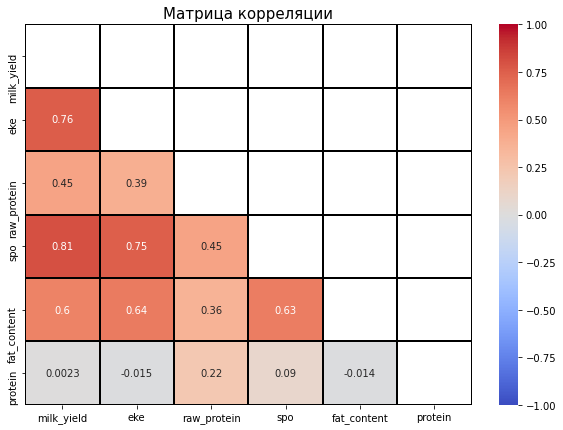

In [63]:
#Построим матрицу корреляции
martix = ferma_main.drop('id', axis=1)
mask = np.triu(martix.corr())
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(martix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=1, linecolor='black', mask = mask) 
plt.title('Матрица корреляции', fontsize = 15)
plt.show()

**Вывод** Самые сильные связи:
- между удоем и СПО (Сахаро-протеиновое соотношение), коэффициент корреляции 0,81. 
- между удоем и ЭКЕ (Энергетическая кормовая единица), коэффициент корреляции 0,76 
- между ЭКЕ (Энергетическая кормовая единица) и СПО (Сахаро-протеиновое соотношение), коэффициент корреляции 0,75
- между ЭКЕ (Энергетическая кормовая единица) и Жирность,%, коэффициент корреляции 0,64
- между Жирность,% и СПО (Сахаро-протеиновое соотношение), коэффициент корреляции 0,63
- между Жирность,% и удоем, коэффициент корреляции 0,6

Количества белка в молоке при этом от других признаков практически не зависит

#### Диаграммы рассеивания

Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.

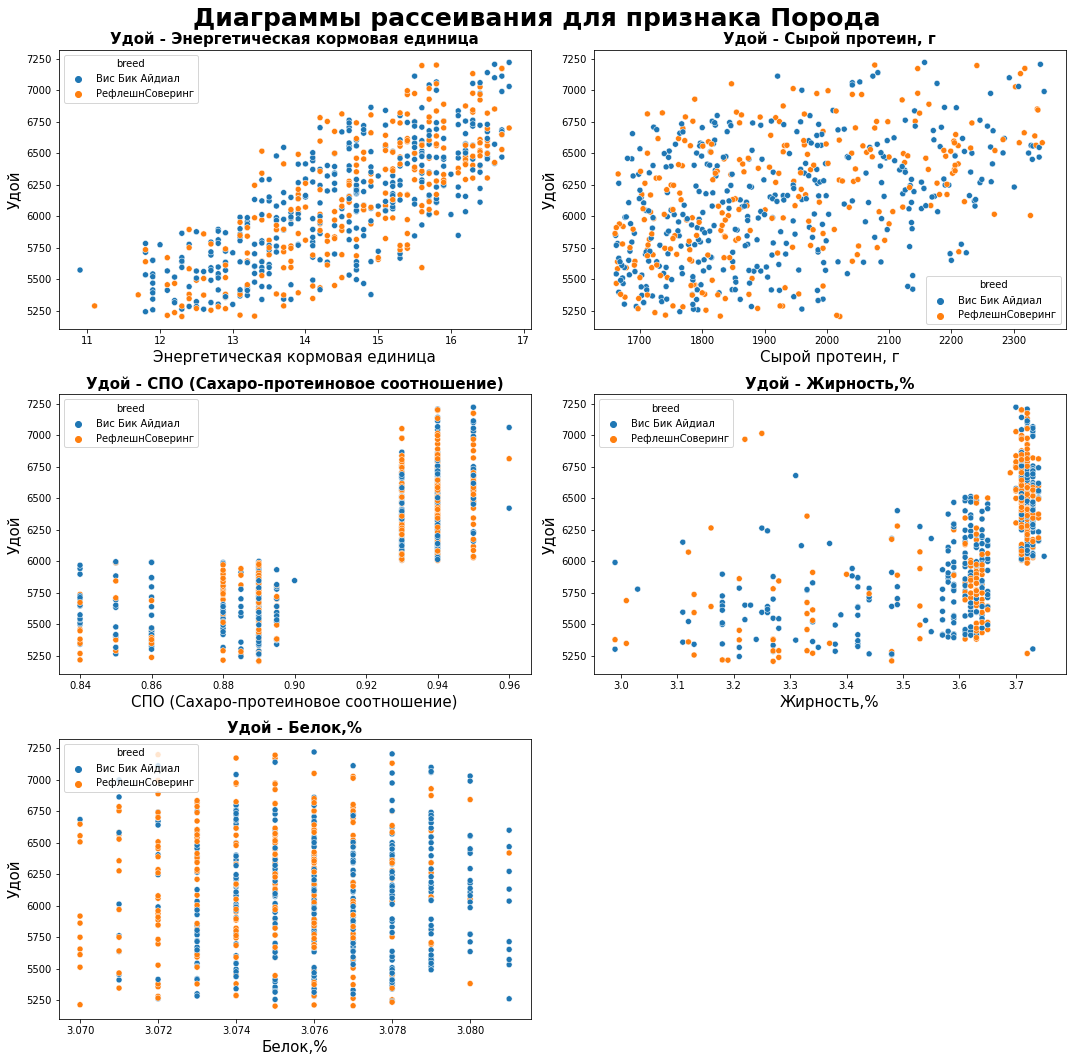

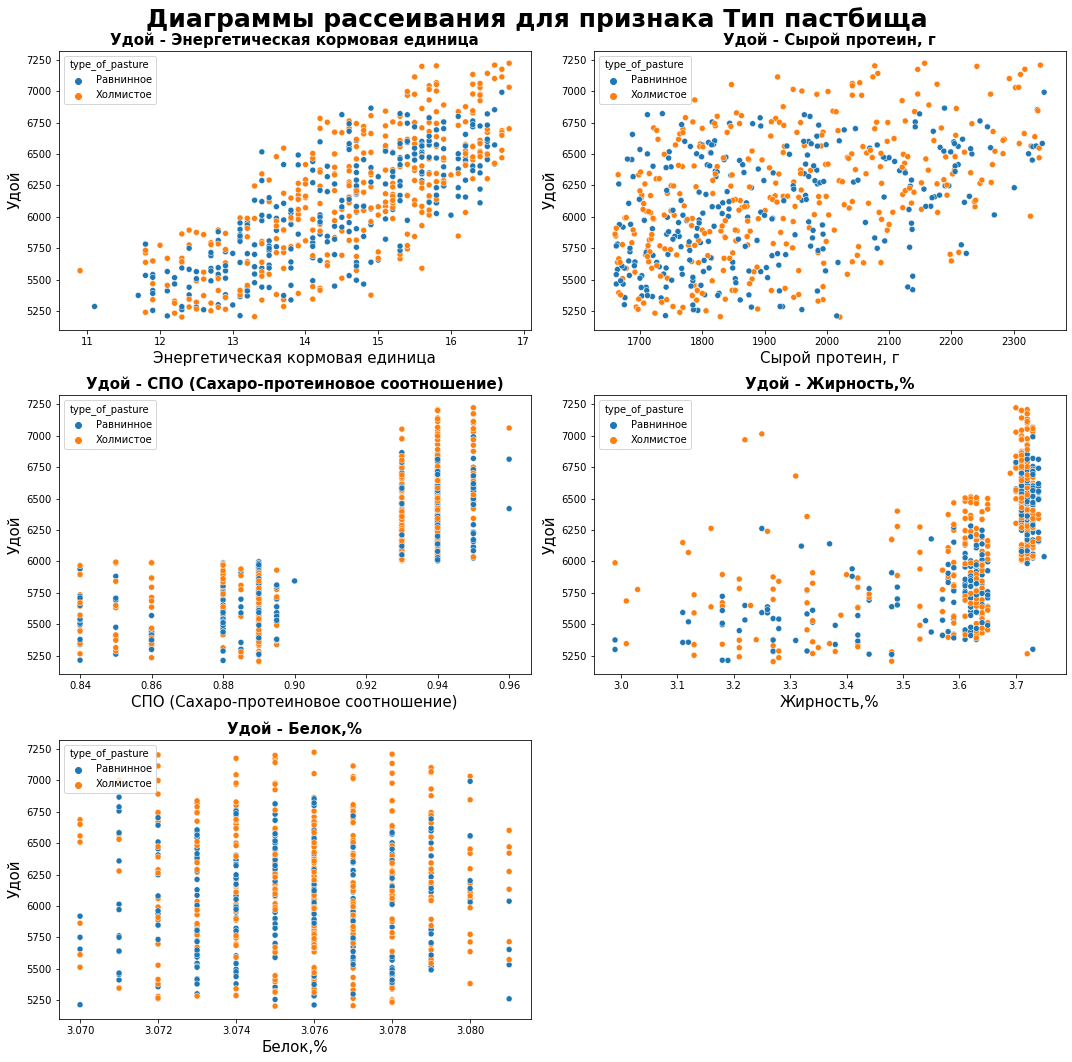

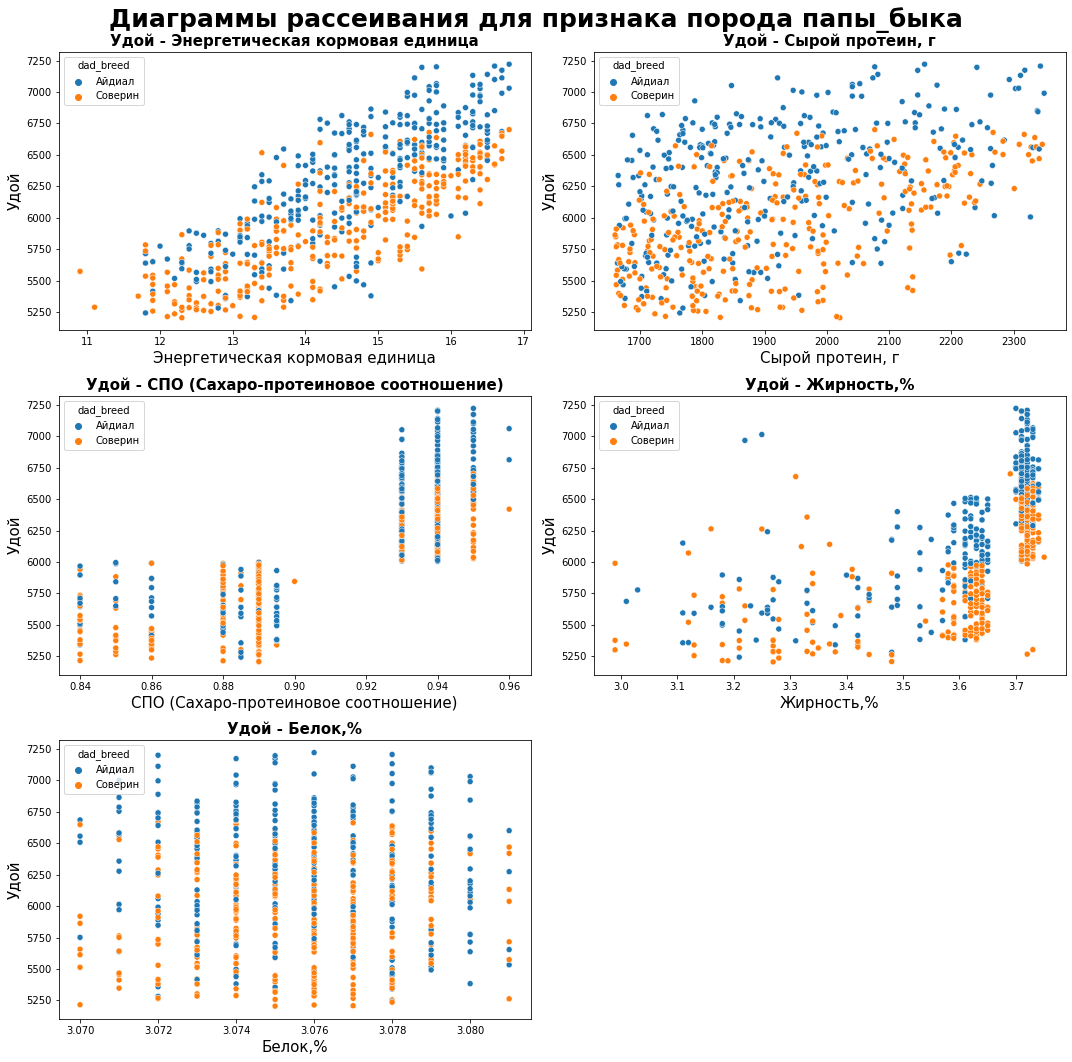

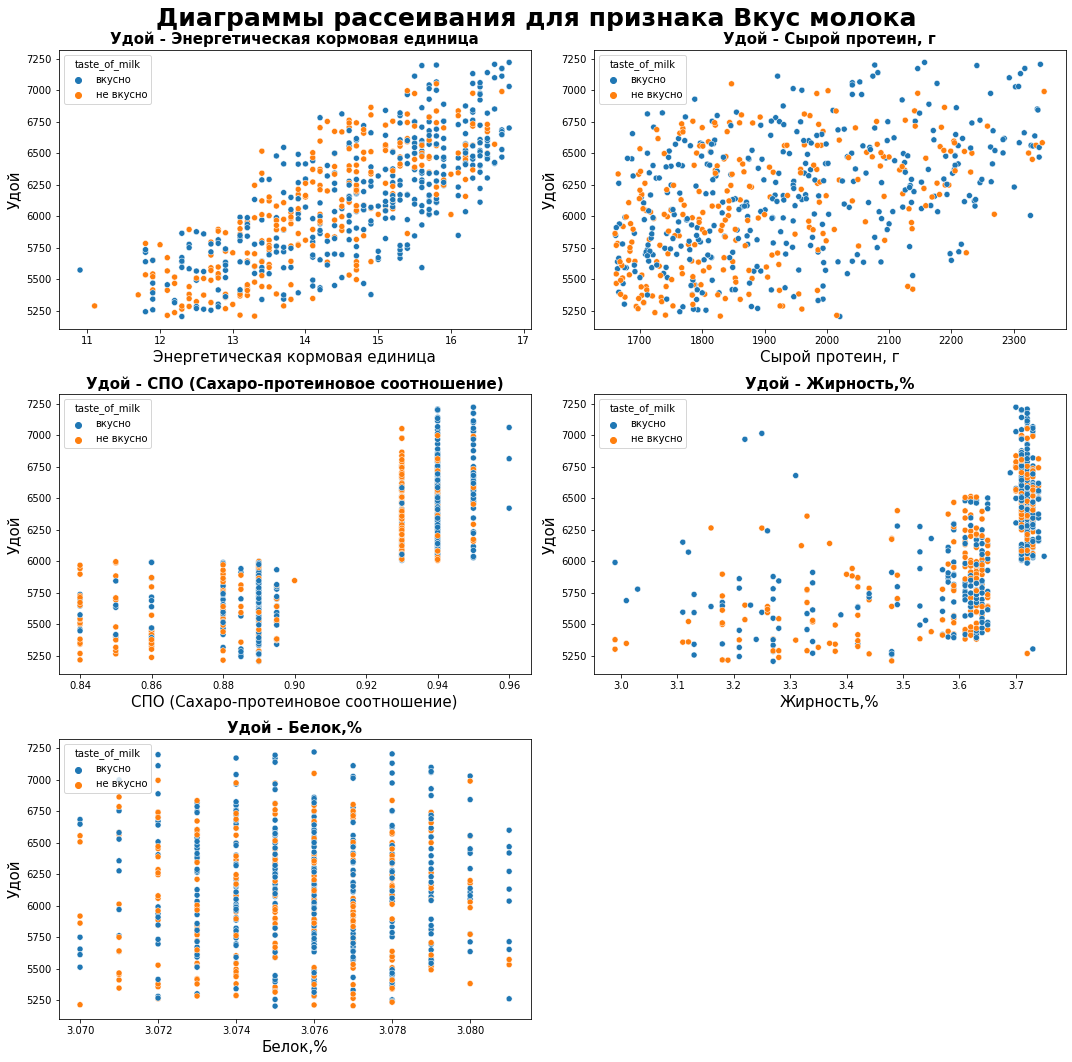

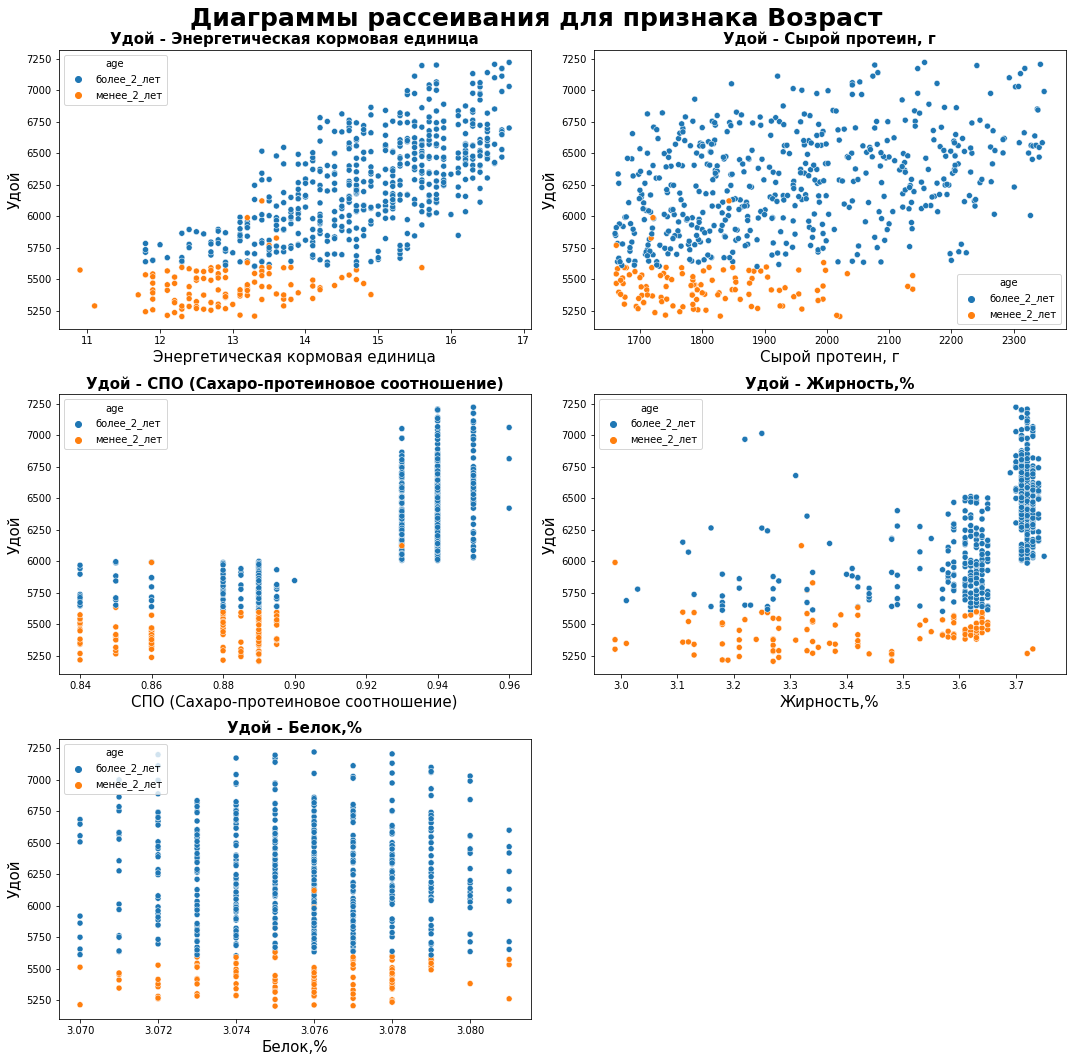

In [64]:
# Создадим список количественных признаков 
quantitative_variables = {'eke': 'Энергетическая кормовая единица', 
                          'raw_protein': 'Сырой протеин, г', 
                          'spo': 'СПО (Сахаро-протеиновое соотношение)',
                          'fat_content': 'Жирность,%',
                          'protein': 'Белок,%'}

# Создадим список категориальных признаков 
categorical_variables = {'breed': 'Порода', 
                         'type_of_pasture': 'Тип пастбища', 
                         'dad_breed': 'порода папы_быка', 
                         'taste_of_milk': 'Вкус молока', 
                         'age': 'Возраст'}

# Построение диаграмм рассеяния

for key in categorical_variables:
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,15))
    fig.suptitle(f'Диаграммы рассеивания для признака {categorical_variables[key]}', fontsize = 25, fontweight='bold')
    temp = 1
    for key1 in quantitative_variables:
        plt.subplot(3, 2, temp)
        sns.scatterplot(data=ferma_main, x=key1, y='milk_yield', hue=key)
        temp += 1
        plt.title(f'Удой - {quantitative_variables[key1]}', fontsize = 15, fontweight='bold')
        #plt.subplot(3, 2, temp).xlable('xlabel')
        plt.xlabel(quantitative_variables[key1], fontsize = 15)
        plt.ylabel('Удой', fontsize = 15)
        
    plt.tight_layout()


In [65]:
#Неактуально
#Построим таблицу коэффициентов корреляции в зависимости от категориального признака
pirson = []
spirman = []
p_val = []
category = []
sub_category = []
quantitative =[]


for key in categorical_variables:
    for i in ferma_main[key].unique():
        for key1 in quantitative_variables:
            category.append(key)
            sub_category.append(i)
            quantitative.append(key1)
            
            
            # Коэфициент корреляции Пирсона
            pirson.append(ferma_main[ferma_main[key] == i][key1].corr(ferma_main[ferma_main[key] == i]['milk_yield']))
            # Коэфициент корреляции Спирмена и p-value
            rho, p = spearmanr(ferma_main[ferma_main[key] == i][key1], ferma_main[ferma_main[key] == i]['milk_yield'])
            spirman.append(rho)
            p_val.append(p)
            #print(name, a,rho,p)
            
#print(name)
dirr_matr_corr = {'category': category, 'sub_category': sub_category, 'quantitative': quantitative, 'pirson': pirson, 'spirman': spirman, 'p_val': p_val} 
matr_corr = pd.DataFrame(dirr_matr_corr)
#display(matr_corr)


**Вывод** Взаимосвязь по удою между количественными и категориальными признаками.

**Порода коровы** практически никак не влияет на количественные показатели. 

**Тип пастбища** количественные показатели у коров, которые паслись в холмистой местности выше, чем у коров, которые паслись на поле. 

**Порода папы быка** Количественные показатели у коров, чей отец был породы Айдиал выше чем, чему у Соверина

**Вкус молока** практически никак не влияет на количественные показатели. 

**Возраст коровы** Количественные показатели у коров младше 2 лет в разы меньше, чем у коров старше 2 лет. 
    

#### Вывод по корреляционному анализу

Целевой признак это удой. Опишем корреляцию с другими признаками.

* **eke - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.** Наблюдаем высокую положительную корреляцию. Коэффициент корреляции равен 0,76. От категориальных признаков зависимость остается, исключение только коровы менее двух лет, в данном случае коэффициент корреляции равен 0,22

*  **raw_protein - Сырой протеин, г — содержание сырого протеина в корме (в граммах).** Наблюдаем умеренную положительную корреляцию. Коэффициент корреляции равен 0,45. От категориальных признаков зависимость остается, исключение только коровы менее двух лет, в данном случае коэффициент корреляции равен -0,08

* **spo - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.**  Наблюдаем весьма высокую положительную корреляцию. Коэффициент корреляции равен 0,81. От категориальных признаков зависимость остается, исключение только коровы менее двух лет, в данном случае коэффициент корреляции равен 0,18

* **fat_content - Жирность,% — содержание жиров в молоке (в процентах).** Наблюдаем заметную положительную корреляцию. Коэффициент корреляции равен 0,6. От категориальных признаков зависимость остается, исключение только коровы менее двух лет, в данном случае коэффициент корреляции равен 0,09

*  **protein - Белок,% — содержание белков в молоке (в процентах).** Наблюдаем слабую положительную корреляцию. Коэффициент корреляции равен 0. От категориальных признаков зависимость остается.

Нелинейные связи.

Линейная зависимость оценивается по коэффициенту корреляции и по графику рассеивания. Не смотря на о что зависимость между целевым признаком удой и СПО (Сахаро-протеиновое соотношение) очень высокая, коэффициент корреляции равен 0,81, но из диаграммы видим что данные во-первых дискретны (расположены в столбиках, т.е. принимают конкретные значения) во-вторых расположены ступеньками, отсюда можем сделать вывод, что между удоем и признаком СПО нет линейной зависимости.

Нелинейная зависимость целевого признака удой также наблюдается с параметром белок, и с со всеми количественными признаками для коров младше 2 лет. 


Нелинейность некоторых признаков может быть связана измерением признаков. Например удой измеряется в тысячах, а СПО исчесляется в десятичных дробях и нужно будет проводить масштабирование данных.

Мультиколлинеарность.

Мультиколлинеарности между входными параметрами нет. Связь между параметрами Жирность, ЭКЕ, СПО есть, но она далеко не 1.



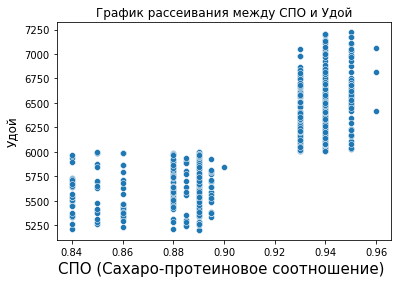

In [66]:
#График рассеивания между СПО и Удой
sns.scatterplot(data=ferma_main, x='spo', y='milk_yield')
plt.xlabel('СПО (Сахаро-протеиновое соотношение) ', fontsize = 15)
plt.ylabel('Удой', fontsize = 12)
plt.title('График рассеивания между СПО и Удой', fontsize = 12)
plt.show()

## Обучение модели линейной регрессии

### Модель 1

Перед обучение модели издавимся от признаков, которые не подходят для линейной регрессии:
* Белок, связь между удоем и количеством белка незначительна и связь между ними не линейная
* id, вообще ни как не зависит от удоя
* Вкус молока, так как данного признака нет в данных с коровами которых хочет купить фермер
* Жирность молока, так как это характеристика молока и с удоем она не связана


In [67]:
#Создадим новый датафрейм для модели
ferma_mo_1 = ferma_main.drop(['id', 'protein', 'taste_of_milk', 'fat_content'], axis=1)
ferma_mo_1.head(1)

,milk_yield,eke,raw_protein,spo,breed,type_of_pasture,dad_breed,age
0,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет


In [68]:
#разобьем данные 

X = ferma_mo_1.drop('milk_yield', axis=1)
y = ferma_mo_1['milk_yield']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(467, 7)
(156, 7)
(467,)
(156,)


Закодируем категориальные признаки с помощью OneHotEncoder

In [69]:
!pip install scikit-learn==1.1.3 -q

In [70]:
# выберем класс OneHotEncoder() для кодирования 
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['breed', 'type_of_pasture', 'dad_breed', 'age']

# кодирование тренировочной выборки
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 

# кодирование тестовой выборки
X_test_ohe = encoder.transform(X_test[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names()

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Масштабируем количественные признаки с помощью StandardScaler

In [71]:
# список всех количественных признаков из тренировочной выборки
num_col_names = ['eke', 'raw_protein', 'spo']

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [72]:
#Объединим все преобразованные данные в один датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
print(X_train.shape)
print(X_test.shape)

(467, 7)
(156, 7)


Построем гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности выполнения масштабирования.

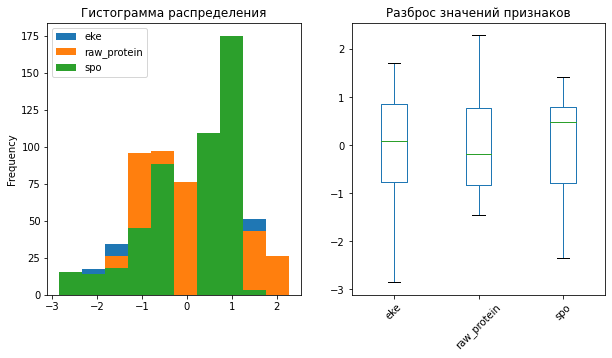

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Обучим модель линейной регрессии на подготовленных данных.

In [74]:
#Создадим модель линейной регрессии 
model_lr  = LinearRegression()

#обучим модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получим предсказания модели на тестовых данных 
predictions_1 = model_lr.predict(X_test) 


Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.

In [75]:
# рассчитаем значения R2 для линейной регрессии
r2_1 = r2_score(y_test, predictions_1)

# На этомже шаге также расчитаем MSE, MAE, RMSE

mse_1 = mean_squared_error(y_test, predictions_1)
mae_1 = mean_absolute_error(y_test, predictions_1) 
rmse_1 = mean_squared_error(y_test, predictions_1, squared=False)

print("R2 LinearRegression =", r2_1)


R2 LinearRegression = 0.7832029531509055


Анализ остатков

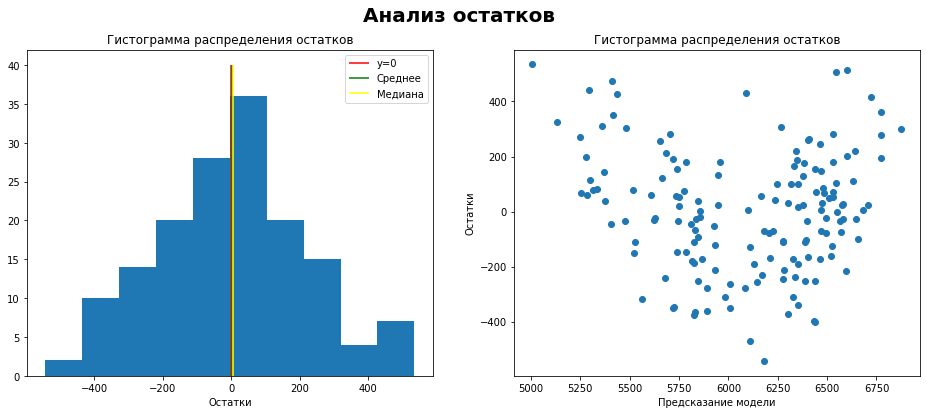

In [76]:
# Выделяем остатки
residuals_1 =  y_test - predictions_1

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Анализ остатков', fontsize = 20, fontweight='bold')

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(residuals_1)
ax[0].vlines(x=0, colors = 'red', ymin=0, ymax=40, label='y=0')
ax[0].vlines(x=residuals_1.mean(), colors = 'green', ymin=0, ymax=40, label='Среднее')
ax[0].vlines(x=residuals_1.median(), colors = 'yellow', ymin=0, ymax=40, label='Медиана')


ax[0].set_title('Гистограмма распределения остатков')
ax[0].set_xlabel('Остатки')
ax[0].legend()


ax[1].scatter(predictions_1,residuals_1)
ax[1].set_title('Гистограмма распределения остатков')
ax[1].set_xlabel('Предсказание модели')
ax[1].set_ylabel('Остатки')

plt.show()

#### Вывод по модели 1

Остатки распределены нормально, симметрично относительно нуля, среднего и медианы. Значит, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения. Модель даёт как завышенные, так и заниженные предсказания, которые «уравновешивают» друг друга.Коэффициент детерминации R2 = 0,783. Значит наша модель работает качественно.
Чтобы улучшить качество предсказания модели можно добавить дополнительных признаков, либо изменив связь вводных параметров с целевыми.

### Модель 2

С учетом изменения связей вводных параметров с целевыми

#### Взаимосвязь СПО и Удой

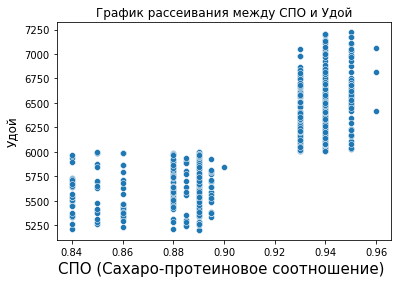

In [77]:
#График рассеивания между СПО и Удой
sns.scatterplot(data=ferma_main, x='spo', y='milk_yield')
plt.xlabel('СПО (Сахаро-протеиновое соотношение) ', fontsize = 15)
plt.ylabel('Удой', fontsize = 12)
plt.title('График рассеивания между СПО и Удой', fontsize = 12)
plt.show()

Из графика видно, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.

In [78]:
#Добавим бинарный признак spo_category
ferma_main['spo_category'] = ferma_main['spo'].apply(lambda x: 'менее_0.92' if x<0.92 else 'более_0.92')
display(ferma_main.head(1))
print(ferma_main['spo_category'].value_counts())

,id,milk_yield,eke,raw_protein,spo,breed,type_of_pasture,dad_breed,fat_content,protein,taste_of_milk,age,spo_category
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92


более_0.92    369
менее_0.92    254
Name: spo_category, dtype: int64


#### Взаимосвязь ЭКЕ и Удой

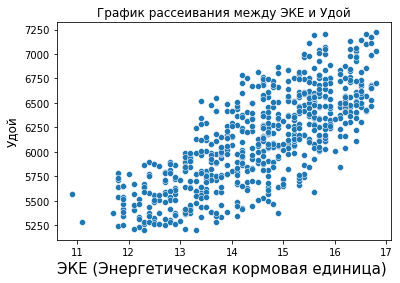

In [79]:
#График рассеивания между ЭКЕ и Удой
sns.scatterplot(data=ferma_main, x='eke', y='milk_yield')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица) ', fontsize = 15)
plt.ylabel('Удой', fontsize = 12)
plt.title('График рассеивания между ЭКЕ и Удой', fontsize = 12)
plt.show()

In [80]:
print('Коэффициент корреляции Пирсона',ferma_main['milk_yield'].corr(ferma_main['eke']))

Коэффициент корреляции Пирсона 0.7649753640847841


In [81]:
ferma_main['eke_sqr'] = ferma_main['eke'] ** 2
display(ferma_main.head(1))


,id,milk_yield,eke,raw_protein,spo,breed,type_of_pasture,dad_breed,fat_content,protein,taste_of_milk,age,spo_category,eke_sqr
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92,201.64


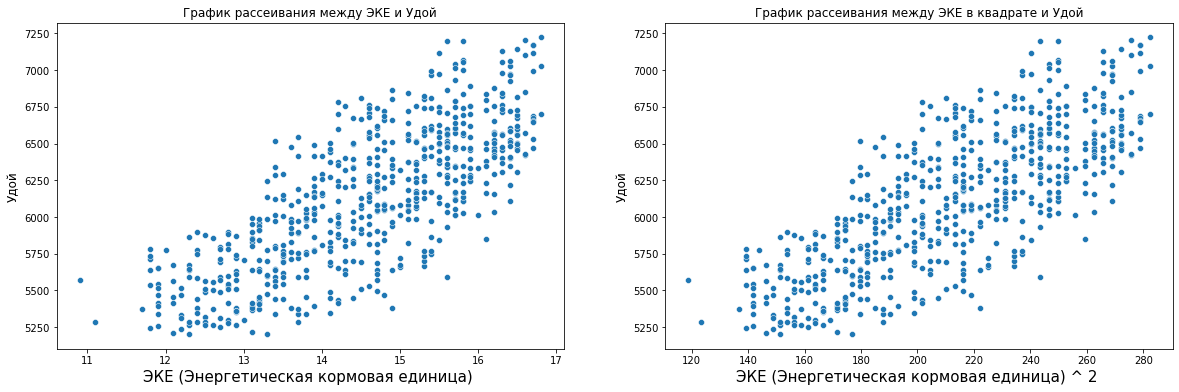

In [82]:

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1) #График рассеивания между ЭКЕ и Удой
sns.scatterplot(data=ferma_main, x='eke', y='milk_yield')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица) ', fontsize = 15)
plt.ylabel('Удой', fontsize = 12)
plt.title('График рассеивания между ЭКЕ и Удой', fontsize = 12)

plt.subplot(1, 2, 2) #График рассеивания между ЭКЕ в квадрате и Удой
sns.scatterplot(data=ferma_main, x='eke_sqr', y='milk_yield')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица) ^ 2 ', fontsize = 15)
plt.ylabel('Удой', fontsize = 12)
plt.title('График рассеивания между ЭКЕ в квадрате и Удой', fontsize = 12)
plt.show()
plt.show()

In [83]:
print('Коэффициент корреляции Пирсона ЭКЕ',ferma_main['milk_yield'].corr(ferma_main['eke']))
print('Коэффициент корреляции Пирсона Эке в квадрате',ferma_main['milk_yield'].corr(ferma_main['eke_sqr']))

Коэффициент корреляции Пирсона ЭКЕ 0.7649753640847841
Коэффициент корреляции Пирсона Эке в квадрате 0.7652992560122428


#### Обучение модели

In [84]:
#Создадим новый датафрейм для модели
ferma_mo_2 = ferma_main.drop(['id', 'protein', 'eke', 'spo','taste_of_milk', 'fat_content'], axis=1)
ferma_mo_2.head(1)

,milk_yield,raw_protein,breed,type_of_pasture,dad_breed,age,spo_category,eke_sqr
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,менее_0.92,201.64


In [85]:
#разобьем данные 

X = ferma_mo_2.drop('milk_yield', axis=1)
y = ferma_mo_2['milk_yield']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(467, 7)
(156, 7)
(467,)
(156,)


Закодируем категориальные признаки с помощью OneHotEncoder

In [86]:
# выберем класс OneHotEncoder() для кодирования 
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['breed', 'type_of_pasture', 'dad_breed', 'age', 'spo_category']

# кодирование тренировочной выборки
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 

# кодирование тестовой выборки
X_test_ohe = encoder.transform(X_test[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names()

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Масштабируем количественные признаки с помощью StandardScaler

In [87]:
# список всех количественных признаков из тренировочной выборки
num_col_names = ['raw_protein', 'eke_sqr']

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [88]:
#Объединим все преобразованные данные в один датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
print(X_train.shape)
print(X_test.shape)

(467, 7)
(156, 7)


Построем гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности выполнения масштабирования.

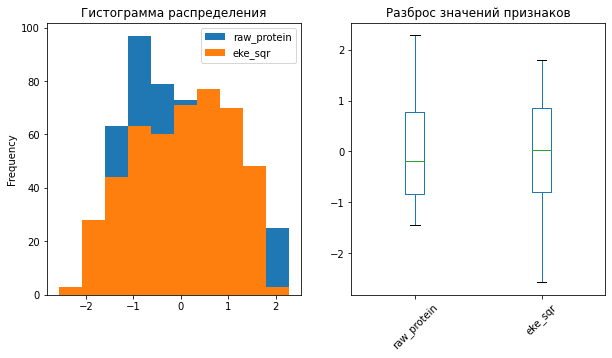

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Обучим модель линейной регрессии на подготовленных данных.

In [90]:
#Создадим модель линейной регрессии 
model_lr  = LinearRegression()

#обучим модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получим предсказания модели на тестовых данных 
predictions_2 = model_lr.predict(X_test) 


Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.

In [91]:
# рассчитаем значения R2 для линейной регрессии
r2_2 = r2_score(y_test, predictions_2)

# На этомже шаге также расчитаем MSE, MAE, RMSE

mse_2 = mean_squared_error(y_test, predictions_2)
mae_2 = mean_absolute_error(y_test, predictions_2) 
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
print("R2 LinearRegression =", r2_2)


R2 LinearRegression = 0.8347436421181884


Анализ остатков

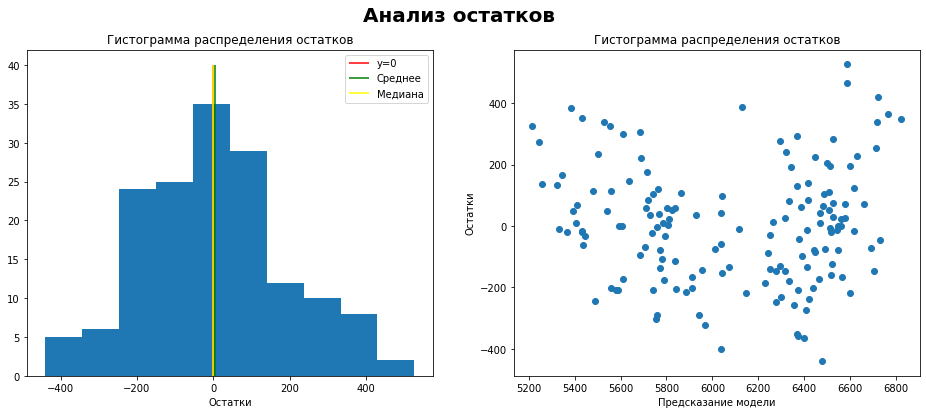

In [92]:
# Выделяем остатки
residuals_2 =  y_test - predictions_2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Анализ остатков', fontsize = 20, fontweight='bold')

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(residuals_2)
ax[0].vlines(x=0, colors = 'red', ymin=0, ymax=40, label='y=0')
ax[0].vlines(x=residuals_2.mean(), colors = 'green', ymin=0, ymax=40, label='Среднее')
ax[0].vlines(x=residuals_2.median(), colors = 'yellow', ymin=0, ymax=40, label='Медиана')


ax[0].set_title('Гистограмма распределения остатков')
ax[0].set_xlabel('Остатки')
ax[0].legend()


ax[1].scatter(predictions_2,residuals_2)
ax[1].set_title('Гистограмма распределения остатков')
ax[1].set_xlabel('Предсказание модели')
ax[1].set_ylabel('Остатки')

plt.show()

#### Вывод по модели 2

Остатки распределены нормально, симметрично относительно нуля, среднего и медианы. Значит, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения. Модель даёт как завышенные, так и заниженные предсказания, которые «уравновешивают» друг друга.Коэффициент детерминации R2 = 0.834. Значит наша модель работает качественно. Чтобы улучшить качество предсказания модели можно добавить дополнительных признаков, либо изменив связь вводных параметров с целевыми.

### Модель 3

С добавлением новых признаков

In [93]:
# Добавим имя_папы из файла ferma_dad

ferma_main = ferma_main.merge(ferma_dad, on='id')
display(ferma_main.head(1))
display(ferma_main['dad_name'].value_counts())

,id,milk_yield,eke,raw_protein,spo,breed,type_of_pasture,dad_breed,fat_content,protein,taste_of_milk,age,spo_category,eke_sqr,dad_name
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92,201.64,Буйный


Барин       240
Буйный      212
Соловчик    107
Геркулес     64
Name: dad_name, dtype: int64

In [94]:
#Создадим новый датафрейм для модели
ferma_mo_3 = ferma_main.drop(['id', 'protein', 'eke', 'spo', 'taste_of_milk', 'fat_content'], axis=1)
ferma_mo_3.head(1)

,milk_yield,raw_protein,breed,type_of_pasture,dad_breed,age,spo_category,eke_sqr,dad_name
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,менее_0.92,201.64,Буйный


Обучение модели

In [95]:
#разобьем данные 

X = ferma_mo_3.drop('milk_yield', axis=1)
y = ferma_mo_3['milk_yield']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(467, 8)
(156, 8)
(467,)
(156,)


Закодируем категориальные признаки с помощью OneHotEncoder

In [96]:
# выберем класс OneHotEncoder() для кодирования 
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['breed', 'type_of_pasture', 'dad_breed', 'age', 'spo_category','dad_name']

# кодирование тренировочной выборки
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 

# кодирование тестовой выборки
X_test_ohe = encoder.transform(X_test[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names()

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Масштабируем количественные признаки с помощью StandardScaler

In [97]:
# список всех количественных признаков из тренировочной выборки
num_col_names = ['raw_protein', 'eke_sqr']

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [98]:
#Объединим все преобразованные данные в один датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
print(X_train.shape)
print(X_test.shape)

(467, 10)
(156, 10)


Построем гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности выполнения масштабирования.

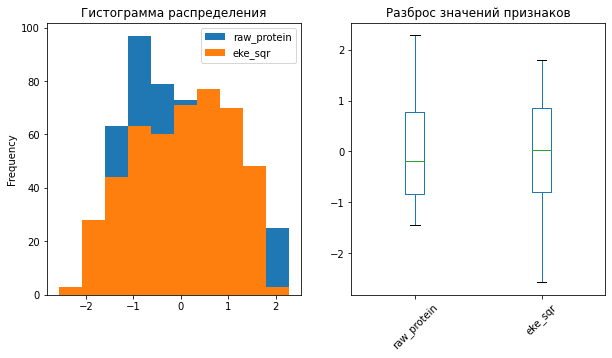

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Обучим модель линейной регрессии на подготовленных данных.

In [100]:
#Создадим модель линейной регрессии 
model_lr  = LinearRegression()

#обучим модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получим предсказания модели на тестовых данных 
predictions_3 = model_lr.predict(X_test) 


Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.

In [101]:
# рассчитаем значения R2 для линейной регрессии
r2_3 = r2_score(y_test, predictions_3)
print("R2 LinearRegression =", r2_3)

# На этомже шаге также расчитаем MSE, MAE, RMSE

mse_3 = mean_squared_error(y_test, predictions_3)
mae_3 = mean_absolute_error(y_test, predictions_3) 
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)


R2 LinearRegression = 0.8413986635664519


Анализ остатков

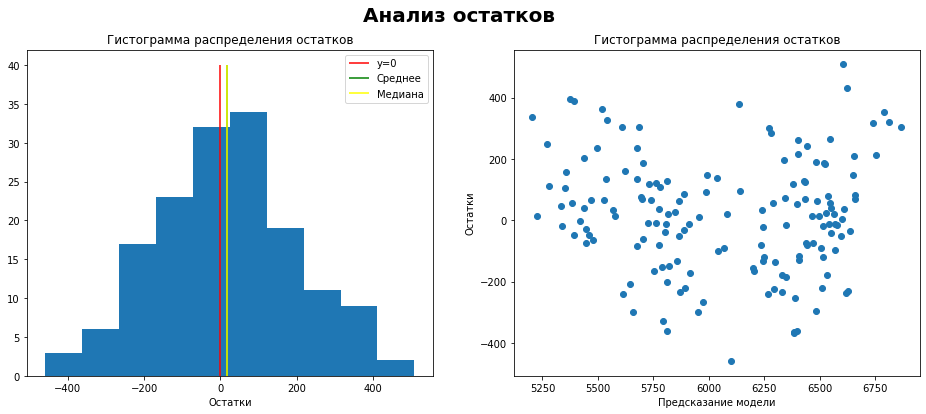

In [102]:
# Выделяем остатки
residuals_3 =  y_test - predictions_3

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Анализ остатков', fontsize = 20, fontweight='bold')

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(residuals_3)
ax[0].vlines(x=0, colors = 'red', ymin=0, ymax=40, label='y=0')
ax[0].vlines(x=residuals_3.mean(), colors = 'green', ymin=0, ymax=40, label='Среднее')
ax[0].vlines(x=residuals_3.median(), colors = 'yellow', ymin=0, ymax=40, label='Медиана')


ax[0].set_title('Гистограмма распределения остатков')
ax[0].set_xlabel('Остатки')
ax[0].legend()


ax[1].scatter(predictions_3,residuals_3)
ax[1].set_title('Гистограмма распределения остатков')
ax[1].set_xlabel('Предсказание модели')
ax[1].set_ylabel('Остатки')

plt.show()

#### Вывод по модели 3

Остатки распределены нормально, симметрично относительно нуля, среднего и медианы. Значит, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения. Модель даёт как завышенные, так и заниженные предсказания, которые «уравновешивают» друг друга.Коэффициент детерминации R2 = 0.841. Значит наша модель работает качественно. 

### Сравнение моделей

#### Коэффициент детерминации R²

In [103]:
print('Коэффициент детерминации R² первой модели:', r2_1.round(3))
print('Коэффициент детерминации R² второй модели:', r2_2.round(3))
print('Коэффициент детерминации R² третьей модели:', r2_3.round(3))

Коэффициент детерминации R² первой модели: 0.783
Коэффициент детерминации R² второй модели: 0.835
Коэффициент детерминации R² третьей модели: 0.841


#### Анализ остатков

In [104]:
print('Среднее значение остатков первой модели:', residuals_1.mean().round(3))
print('Среднее значение остатков второй модели:', residuals_2.mean().round(3))
print('Среднее значение остатков третьей модели:', residuals_3.mean().round(3))

Среднее значение остатков первой модели: 1.662
Среднее значение остатков второй модели: 3.74
Среднее значение остатков третьей модели: 16.984


In [105]:
print('Медианное значение остатков первой модели:', residuals_1.median().round(3))
print('Медианное значение остатков второй модели:', residuals_2.median().round(3))
print('Медианное значение остатков третьей модели:', residuals_3.median().round(3))

Медианное значение остатков первой модели: 6.279
Медианное значение остатков второй модели: -0.889
Медианное значение остатков третьей модели: 16.997


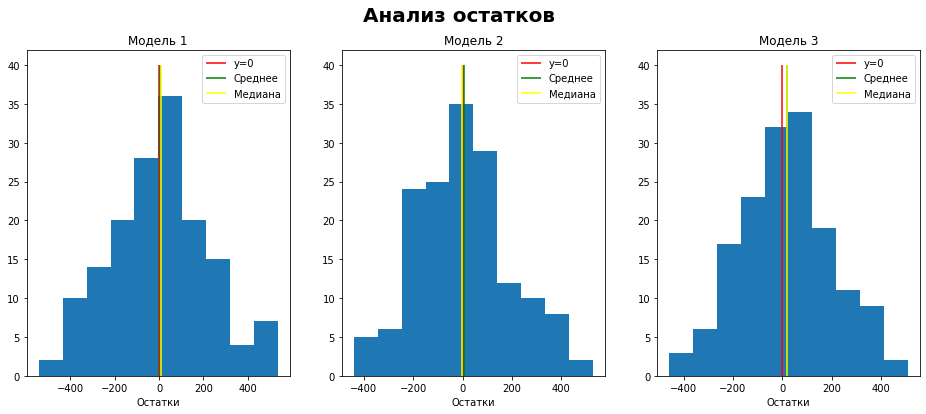

In [106]:
# Гистограмма распределения остатков

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
fig.suptitle('Анализ остатков', fontsize = 20, fontweight='bold')

ax[0].hist(residuals_1)
ax[0].vlines(x=0, colors = 'red', ymin=0, ymax=40, label='y=0')
ax[0].vlines(x=residuals_1.mean(), colors = 'green', ymin=0, ymax=40, label='Среднее')
ax[0].vlines(x=residuals_1.median(), colors = 'yellow', ymin=0, ymax=40, label='Медиана')
ax[0].set_title('Модель 1')
ax[0].set_xlabel('Остатки')
ax[0].legend()

ax[1].hist(residuals_2)
ax[1].vlines(x=0, colors = 'red', ymin=0, ymax=40, label='y=0')
ax[1].vlines(x=residuals_2.mean(), colors = 'green', ymin=0, ymax=40, label='Среднее')
ax[1].vlines(x=residuals_2.median(), colors = 'yellow', ymin=0, ymax=40, label='Медиана')
ax[1].set_title('Модель 2')
ax[1].set_xlabel('Остатки')
ax[1].legend()

ax[2].hist(residuals_3)
ax[2].vlines(x=0, colors = 'red', ymin=0, ymax=40, label='y=0')
ax[2].vlines(x=residuals_3.mean(), colors = 'green', ymin=0, ymax=40, label='Среднее')
ax[2].vlines(x=residuals_3.median(), colors = 'yellow', ymin=0, ymax=40, label='Медиана')
ax[2].set_title('Модель 3')
ax[2].set_xlabel('Остатки')
ax[2].legend()

plt.show()

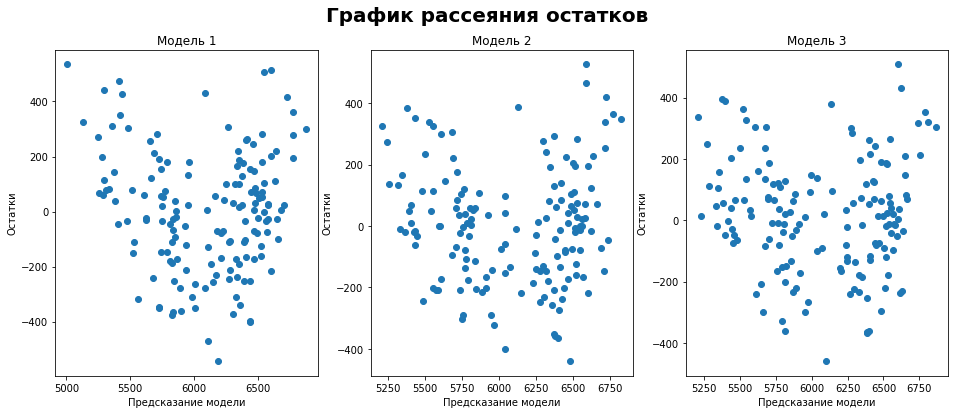

In [107]:
# График рассеяния остатков

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
fig.suptitle('График рассеяния остатков', fontsize = 20, fontweight='bold')

ax[0].scatter(predictions_1,residuals_1)
ax[0].set_title('Модель 1')
ax[0].set_xlabel('Предсказание модели')
ax[0].set_ylabel('Остатки')

ax[1].scatter(predictions_2,residuals_2)
ax[1].set_title('Модель 2')
ax[1].set_xlabel('Предсказание модели')
ax[1].set_ylabel('Остатки')

ax[2].scatter(predictions_3,residuals_3)
ax[2].set_title('Модель 3')
ax[2].set_xlabel('Предсказание модели')
ax[2].set_ylabel('Остатки')

plt.show()

#### Сравнение моделей. Вывод

* У третьей модели самый высокий Коэффициент детерминации R² = 0.841
* У первой модели наимельшее среднее значение остатков модели = 1.662
* У первой модели наимельшее медианное значение остатков модели = -0.889

### Оценка качества моделей по трём метрикам: MSE, MAE, RMSE.

#### Сравнение MSE, MAE, RMSE

In [108]:
print('MSE первой модели:', mse_1.round(2))
print('MSE второй модели:', mse_2.round(2))
print('MSE третьей модели:', mse_3.round(2))
print('*'*125)

print('MAE первой модели:', mae_1.round(2))
print('MAE второй модели:', mae_2.round(2))
print('MAE третьей модели:', mae_3.round(2))
print('*'*125)

print('RMSE первой модели:', rmse_1.round(2))
print('RMSE второй модели:', rmse_2.round(2))
print('RMSE третьей модели:', rmse_3.round(2))
print('*'*125)

MSE первой модели: 47500.0
MSE второй модели: 36207.49
MSE третьей модели: 34749.38
*****************************************************************************************************************************
MAE первой модели: 173.8
MAE второй модели: 149.72
MAE третьей модели: 146.72
*****************************************************************************************************************************
RMSE первой модели: 217.94
RMSE второй модели: 190.28
RMSE третьей модели: 186.41
*****************************************************************************************************************************


Третья модель имеет наименьшие показатели ошибок, следовательно она будет самой точной.

#### Доверительный интервал

Определим доверительный интервал для третьей модели 

In [109]:
print('доверительный 95% интервал для третьей модели', st.t.interval(confidence=0.95, df=len(predictions_3)-1, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

доверительный 95% интервал для третьей модели (6003.145096387503, 6142.246784193167)


In [110]:
print('доверительный интервал для третьей модели: (',np.quantile(predictions_3, .25).round(2),',', np.quantile(predictions_3, .75).round(2),')')

доверительный интервал для третьей модели: ( 5705.55 , 6475.24 )


#### Вывод по оценке качества модели

Лучшая модель - третья. В среднем ошибается на 185,9 кг удоя молока. 

* MSE третьей модели: 34804.19
* MAE третьей модели: 146.46
* RMSE третьей модели: 186.56

доверительный квантильный интервал для третьей модели: (5711.44 , 6470.25)    
доверительный 95% интервал для третьей модели (6000.05, 6140.43)

###  Спрогнозируем удой коров

#### Добавление признаков в таблицу

Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.

In [111]:
# Вычислим среднии значения
eke_mean = ferma_main['eke'].mean()
spo_mean = ferma_main['spo'].mean()
raw_protein_mean = ferma_main['raw_protein'].mean()

#Добавим недостающие признаки
cow_buy['eke_mean'] = eke_mean * 1.05
cow_buy['spo_mean'] = spo_mean * 1.05
cow_buy['raw_protein_mean'] = raw_protein_mean * 1.05

display(cow_buy.head(1))

,breed,type_of_pasture,dad_breed,dad_name,fat_content_now,protein_now,age,eke_mean,spo_mean,raw_protein_mean
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,0.958947,2019.77191


#### Подготовка данных

In [112]:
# Создадим копию датасета
cow_buy_mo = cow_buy.copy()
cow_buy_mo.head(1)

,breed,type_of_pasture,dad_breed,dad_name,fat_content_now,protein_now,age,eke_mean,spo_mean,raw_protein_mean
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,0.958947,2019.77191


In [113]:
#Добавим бинарный признак spo_category
cow_buy_mo['spo_category'] = cow_buy_mo['spo_mean'].apply(lambda x: 'менее_0.92' if x<0.92 else 'более_0.92')
display(cow_buy_mo.head(1))
print(cow_buy_mo['spo_category'].value_counts())

,breed,type_of_pasture,dad_breed,dad_name,fat_content_now,protein_now,age,eke_mean,spo_mean,raw_protein_mean,spo_category
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,0.958947,2019.77191,более_0.92


более_0.92    20
Name: spo_category, dtype: int64


In [114]:
#Возведем признак ЭКЕ в квадрат
cow_buy_mo['eke_sqr'] = cow_buy_mo['eke_mean'] ** 2
display(cow_buy_mo.head(1))

,breed,type_of_pasture,dad_breed,dad_name,fat_content_now,protein_now,age,eke_mean,spo_mean,raw_protein_mean,spo_category,eke_sqr
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,0.958947,2019.77191,более_0.92,233.378833


В качестве тренировочной выборки будет датасет ferma_mo_3

В качестве тестовой выборки будет датасет cow_buy_mo

Приведем названия и количество столбцов к единому формату

In [115]:
display(cow_buy_mo.head(1))
display(ferma_mo_3.head(1))

,breed,type_of_pasture,dad_breed,dad_name,fat_content_now,protein_now,age,eke_mean,spo_mean,raw_protein_mean,spo_category,eke_sqr
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,0.958947,2019.77191,более_0.92,233.378833


,milk_yield,raw_protein,breed,type_of_pasture,dad_breed,age,spo_category,eke_sqr,dad_name
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,менее_0.92,201.64,Буйный


In [116]:
#Приведем названия и количество столбцов к единому формату
cow_buy_mo = cow_buy_mo.drop(['protein_now', 'eke_mean', 'spo_mean', 'fat_content_now'], axis=1)

cow_buy_mo.rename(columns = {'raw_protein_mean':'raw_protein' }, inplace = True )

ferma_mo_3['type_of_pasture'] = ferma_mo_3['type_of_pasture'].str.lower()
              
display(cow_buy_mo.head(1))
display(ferma_mo_3.head(1))

print(ferma_mo_3.shape)
print(cow_buy_mo.shape)

,breed,type_of_pasture,dad_breed,dad_name,age,raw_protein,spo_category,eke_sqr
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,2019.77191,более_0.92,233.378833


,milk_yield,raw_protein,breed,type_of_pasture,dad_breed,age,spo_category,eke_sqr,dad_name
0,5863,1743,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,менее_0.92,201.64,Буйный


(623, 9)
(20, 8)


In [117]:
# Выделем целевой признак в ferma_mo_3 для обучения модели

X_train = ferma_mo_3.drop('milk_yield', axis=1)
y_train = ferma_mo_3['milk_yield']

Закодируем категориальные признаки с помощью OneHotEncoder

In [118]:
# выберем класс OneHotEncoder() для кодирования 
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['breed', 'type_of_pasture', 'dad_breed', 'age', 'spo_category','dad_name']

# кодирование тренировочной выборки
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 

# кодирование тестовой выборки
cow_buy_ohe = encoder.transform(cow_buy_mo[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names()

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

cow_buy_ohe

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_РефлешнСоверинг,x1_холмистое,x2_Соверин,x3_менее_2_лет,x4_менее_0.92,x5_Буйный,x5_Геркулес,x5_Соловчик
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Масштабируем количественные признаки с помощью StandardScaler

In [119]:
# список всех количественных признаков из тренировочной выборки
num_col_names = ['raw_protein', 'eke_sqr']

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
cow_buy_scaled = scaler.transform(cow_buy_mo[num_col_names])

# создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)


In [120]:
#Объединим все преобразованные данные в один датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
cow_buy_mo_new = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

display(cow_buy_mo_new)


,x0_РефлешнСоверинг,x1_холмистое,x2_Соверин,x3_менее_2_лет,x4_менее_0.92,x5_Буйный,x5_Геркулес,x5_Соловчик,raw_protein,eke_sqr
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.526019,0.533587
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.526019,0.533587
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.526019,0.533587
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.526019,0.533587
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.526019,0.533587
5,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.526019,0.533587
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.526019,0.533587
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.526019,0.533587
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.526019,0.533587
9,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.526019,0.533587


Построем гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности выполнения масштабирования.

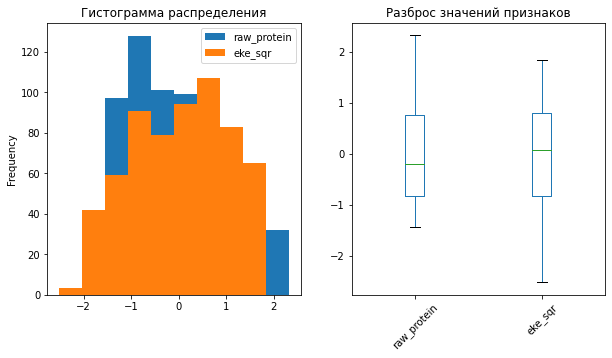

In [121]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

#### Прогноз удоя коров

In [122]:
#Создадим модель линейной регрессии 
model_lr  = LinearRegression()

#обучим модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получим предсказания модели на тестовых данных 
predictions = model_lr.predict(cow_buy_mo_new) 

cow_buy_mo['expected_milk_yield'] = predictions

display(cow_buy_mo)

,breed,type_of_pasture,dad_breed,dad_name,age,raw_protein,spo_category,eke_sqr,expected_milk_yield
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,2019.77191,более_0.92,233.378833,6584.562078
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,менее_2_лет,2019.77191,более_0.92,233.378833,6314.585317
2,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,2019.77191,более_0.92,233.378833,6300.738656
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,более_2_лет,2019.77191,более_0.92,233.378833,6594.628396
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,более_2_лет,2019.77191,более_0.92,233.378833,6544.946909
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,менее_2_лет,2019.77191,более_0.92,233.378833,6371.251382
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,2019.77191,более_0.92,233.378833,6584.562078
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,более_2_лет,2019.77191,более_0.92,233.378833,6534.356462
8,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,2019.77191,более_0.92,233.378833,6300.738656
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,менее_2_лет,2019.77191,более_0.92,233.378833,6374.857250


### Вывод

Для прогноза удоя молока коров были обучены и протестированы 3 модели. Из них выбрали модель с наименьшими показателями ошибок. С помощью лучшей модели спрогнозировали удой коров, которых фермер хочет купить. По условию задачи фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным. На текущий момент, мы можем рекомендовать к покупке всех коров, так как предсказанный удой у всех коров более 6000. Чтобы предсказать вкус молока нужно построить модель логистической регрессии.

## Обучение модели логистической регрессии

### Подготовка данных

Создадим новый датафрейм для логистической регресии. Оставим только те признаки которые есть в датасете с коровами для покупки

In [123]:
display(ferma_main.head(1))
print(ferma_main.shape)

,id,milk_yield,eke,raw_protein,spo,breed,type_of_pasture,dad_breed,fat_content,protein,taste_of_milk,age,spo_category,eke_sqr,dad_name
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92,201.64,Буйный


(623, 15)


In [124]:
display(cow_buy.head(1))
print(cow_buy.shape)

,breed,type_of_pasture,dad_breed,dad_name,fat_content_now,protein_now,age,eke_mean,spo_mean,raw_protein_mean
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,0.958947,2019.77191


(20, 10)


In [125]:
# Создадим новый датафрейм для логистической регресии
# Оставим только те признаки которые есть в датасете с коровами для покупки
ferma_log = ferma_main.drop(['id', 'milk_yield', 'eke', 'spo'], axis=1)
cow_by_log = cow_buy.copy()
display(ferma_log.head(1))
print(ferma_log.shape)
display(cow_by_log.head(1))
print(cow_by_log.shape)

,raw_protein,breed,type_of_pasture,dad_breed,fat_content,protein,taste_of_milk,age,spo_category,eke_sqr,dad_name
0,1743,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92,201.64,Буйный


(623, 11)


,breed,type_of_pasture,dad_breed,dad_name,fat_content_now,protein_now,age,eke_mean,spo_mean,raw_protein_mean
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276742,0.958947,2019.77191


(20, 10)


Приведем данные и названия столбцов к единому стилю написания

In [126]:
ferma_log['type_of_pasture'] = ferma_log['type_of_pasture'].str.lower()

cow_by_log.rename(columns = {'protein_now':'protein', 'raw_protein_mean':'raw_protein' , 'fat_content_now':'fat_content'}, inplace = True )

#Возведем признак ЭКЕ в квадрат
cow_by_log['eke_sqr'] = cow_by_log['eke_mean'] ** 2

#Добавим бинарный признак spo_category
cow_by_log['spo_category'] = cow_by_log['spo_mean'].apply(lambda x: 'менее_0.92' if x<0.92 else 'более_0.92')

#Удалим лишние столбцы
cow_by_log = cow_by_log.drop(['eke_mean', 'spo_mean'], axis=1)

# Сделаем признак вкус молока бинарным
ferma_log['taste_of_milk_category'] = ferma_log['taste_of_milk'].apply(lambda x: 1 if x == 'вкусно' else 0)

#Удалим лишние столбцы
ferma_log = ferma_log.drop(['taste_of_milk'], axis=1)

display(ferma_log.head(1))
print(ferma_log.shape)

display(cow_by_log.head(1))
print(cow_by_log.shape)


,raw_protein,breed,type_of_pasture,dad_breed,fat_content,protein,age,spo_category,eke_sqr,dad_name,taste_of_milk_category
0,1743,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,более_2_лет,менее_0.92,201.64,Буйный,1


(623, 11)


,breed,type_of_pasture,dad_breed,dad_name,fat_content,protein,age,raw_protein,eke_sqr,spo_category
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.77191,233.378833,более_0.92


(20, 10)


### Подготовка модели

In [127]:
#разобьем данные 

X = ferma_log.drop('taste_of_milk_category', axis=1)
y = ferma_log['taste_of_milk_category']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(467, 10)
(156, 10)
(467,)
(156,)


Закодируем категориальные признаки с помощью OneHotEncoder

In [128]:
# выберем класс OneHotEncoder() для кодирования 
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['breed', 'type_of_pasture', 'dad_breed', 'age', 'spo_category','dad_name']

# кодирование тренировочной выборки
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 

# кодирование тестовой выборки
X_test_ohe = encoder.transform(X_test[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names()

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Масштабируем количественные признаки с помощью StandardScaler

In [129]:
# список всех количественных признаков из тренировочной выборки
num_col_names = ['raw_protein', 'eke_sqr', 'fat_content', 'protein']

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [130]:
#Объединим все преобразованные данные в один датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
print(X_train.shape)
print(X_test.shape)

(467, 12)
(156, 12)


Построем гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности выполнения масштабирования.

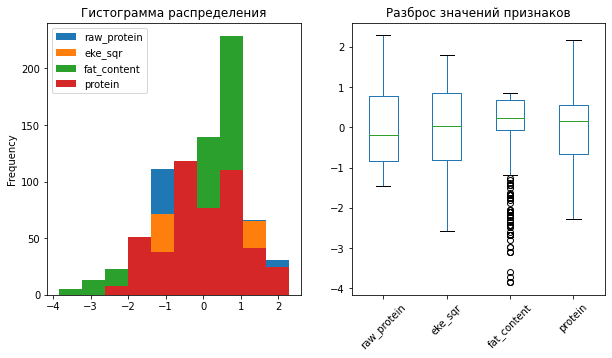

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

### Обучение модели

In [132]:
# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test)

### Качество модели

In [133]:
accuracy_old = accuracy_score(y_test, y_pred)
precision_old = precision_score(y_test, y_pred)
recall_old = recall_score(y_test, y_pred)

print('Accuracy = ', round(accuracy_old, 3))
print('Precision = ', round(precision_old, 3))
print('Recall = ', round(recall_old, 3))

Accuracy =  0.615
Precision =  0.622
Recall =  0.793


### Матрица ошибок

Text(0.5, 1.0, 'Матрица ошибок')

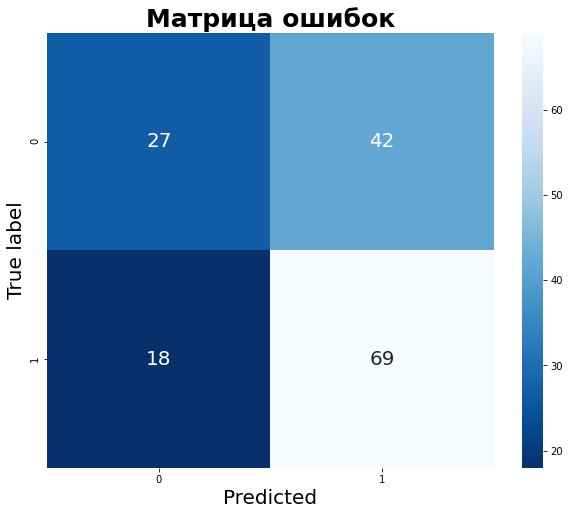

In [134]:
fig, ax = plt.subplots(figsize=(10, 8))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', annot_kws={'size':str(20)})
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.title('Матрица ошибок', fontsize=25, fontweight='bold')

Из матрицы ошибок, видим:
- в 69 случаях модель правильно отнесла вкусное молоко к 'Вкусному'
- в 26 случаях модель правильно отнесла невкусное молоко к 'Не вкусному'  
- в 43 случаях модель неправильно отнесла невкусное молоко к 'Вкусному' (ошибка первого рода)
- в 18 случаях модель неправильно отнесла вкусное молоко к 'Не вкусному' (ошибка второго рода)

Для фермера важен вкус молока, значит мы должны уменьшить ошибки первого рода, когда невкусное молоко, определяется как вкусное. Для этого необходимо изменить порог классификации.

### Порог классификации

In [135]:
#Анализ порога
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_test', 'y_proba']).sort_values(by='y_proba',ascending=False)

# укажем пороговый промежуток от 0,1 до 1
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]
print(thresholds) 

[0.1, 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91]


In [136]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x > i else 0)

# выведем 5 случайных строк
display(data.sample(5))

,y_test,y_proba,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,y_pred_0.82,y_pred_0.91
26,1,0.855367,1,1,1,1,1,1,1,1,1,0
116,0,0.493030,1,1,1,1,1,0,0,0,0,0
150,1,0.838967,1,1,1,1,1,1,1,1,1,0
114,1,0.612991,1,1,1,1,1,1,0,0,0,0
135,1,0.478736,1,1,1,1,1,0,0,0,0,0


In [137]:
for i in thresholds:
    print(f'y_pred_{i} precision = ', precision_score(data['y_test'], data[f'y_pred_{i}']).round(3))
    print(f'y_pred_{i} recall = ', recall_score(data['y_test'], data[f'y_pred_{i}']).round(3))
    print(f'y_pred_{i} FP = ', data.loc[(data[f'y_pred_{i}'] == 1) & (data['y_test'] == 0)].shape[0])
    print('*' * 125)


y_pred_0.1 precision =  0.558
y_pred_0.1 recall =  1.0
y_pred_0.1 FP =  69
*****************************************************************************************************************************
y_pred_0.19 precision =  0.561
y_pred_0.19 recall =  1.0
y_pred_0.19 FP =  68
*****************************************************************************************************************************
y_pred_0.28 precision =  0.566
y_pred_0.28 recall =  0.989
y_pred_0.28 FP =  66
*****************************************************************************************************************************
y_pred_0.37 precision =  0.567
y_pred_0.37 recall =  0.92
y_pred_0.37 FP =  61
*****************************************************************************************************************************
y_pred_0.46 precision =  0.591
y_pred_0.46 recall =  0.862
y_pred_0.46 FP =  52
********************************************************************************************************

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Видим, что при пороге меньше 0,64 много ошибок первого рода, а при пороге выше 0,82 очень сильно падает метрика recall, рассмотрим интервал 0,64 - 0,82 подробне

In [138]:
# укажем пороговый промежуток от 0,1 до 1
thresholds = [round(i,2) for i in np.linspace(0.64,0.82,num = 18,endpoint=False)]
print(thresholds) 

[0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81]


In [139]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x > i else 0)

# выведем 5 случайных строк
display(data.sample(5))


,y_test,y_proba,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,...,y_pred_0.71,y_pred_0.72,y_pred_0.74,y_pred_0.75,y_pred_0.76,y_pred_0.77,y_pred_0.78,y_pred_0.79,y_pred_0.8,y_pred_0.81
47,1,0.493744,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0.406617,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,0.362234,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,1,0.686656,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
57,1,0.662743,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
df_new = pd.DataFrame(columns=['порог', 'precision', 'recall', 'количество_FP'])

for i in thresholds:
    precision = precision_score(data['y_test'], data[f'y_pred_{i}']).round(3)
    recall = recall_score(data['y_test'], data[f'y_pred_{i}']).round(3)
    FP = data.loc[(data[f'y_pred_{i}'] == 1) & (data['y_test'] == 0)].shape[0]
    # число предсказанных объектов
    predicted_objects = data[f'y_pred_{i}'].sum()
    
    df_new = df_new.append({
        'порог': i,
        'precision': precision,
        'recall': recall,
        'количество_FP': FP,
        'число предсказанных объектов':predicted_objects
        }, ignore_index=True) 
    
display(df_new)

,порог,precision,recall,количество_FP,число предсказанных объектов
0,0.64,0.719,0.529,18.0,64.0
1,0.65,0.726,0.517,17.0,62.0
2,0.66,0.707,0.471,17.0,58.0
3,0.67,0.731,0.437,14.0,52.0
4,0.68,0.755,0.425,12.0,49.0
5,0.69,0.750,0.379,11.0,44.0
6,0.70,0.756,0.356,10.0,41.0
7,0.71,0.757,0.322,9.0,37.0
8,0.72,0.812,0.299,6.0,32.0
9,0.73,0.833,0.287,5.0,30.0


Пороговое значение 0,73 будет оптимальным, при нем мы сократили количество ошибок первого рода до 5, сократив при этом число предсказанных объектов вдвое. Метрика recall при этом 0,299, но наша цель уменьшить количество ошибок первого рода, повысив precision 0,839

In [141]:
# выделяем оптимальный порог
OPT_THRESHOLD = 0.73

# применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > OPT_THRESHOLD).astype(int)

# проводим оценку точности
accuracy_new = accuracy_score(y_test, y_pred_threshold)
recall_new = recall_score(y_test, y_pred_threshold)
precision_new = precision_score(y_test, y_pred_threshold)

# вывод результатов (до / после изменения пороговых значений)
print(f'accuracy before: {accuracy_old.round(3)} / accuracy after: {accuracy_new.round(3)}')
print(f'recall before: {recall_old.round(3)} / recall after: {recall_new.round(3)}')
print(f'precision before: {precision_old.round(3)} / precision after: {precision_new.round(3)}')


accuracy before: 0.615 / accuracy after: 0.571
recall before: 0.793 / recall after: 0.287
precision before: 0.622 / precision after: 0.833


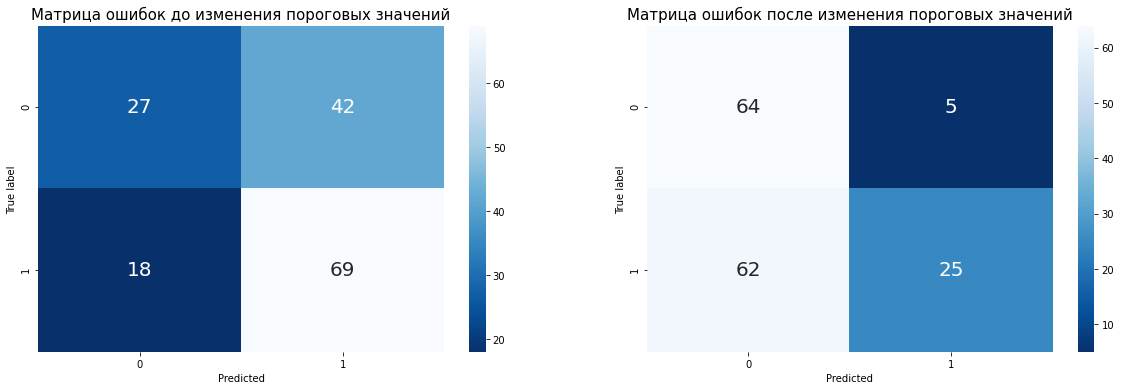

In [142]:
# построение матрицы ошибок (до / после изменения пороговых значений)
cm_new = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', annot_kws={'size':str(20)})
plt.title('Матрица ошибок до изменения пороговых значений', fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted');

plt.subplot(1, 2, 2)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r', annot_kws={'size':str(20)})
plt.title('Матрица ошибок после изменения пороговых значений', fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted');

Результаты изменения пороговых значений:
* количество ошибок первого рода существенно снизилось (с 43 до 5)
* метрика accuracy практически не изменилась (0.609 / 0.577)
* метрика recall сильно уменьшилась (с 0.793 до 0.299)
* метрика precision увеличилась (с 0.616 до 0.839)

---
Далее создадим новую тренировочную выборку, на которой обучим модель с учетом новых пороговых значений и получим предсказания на тестовой выборке.


### Прогноз вкуса молока

In [143]:
#Тренировачная выборка
display(ferma_log.head(1))
print(ferma_log.shape)

#Тестовая выборка
display(cow_by_log.head(1))
print(cow_by_log.shape)

X_train = ferma_log.drop('taste_of_milk_category', axis=1)
y_train = ferma_log['taste_of_milk_category']

,raw_protein,breed,type_of_pasture,dad_breed,fat_content,protein,age,spo_category,eke_sqr,dad_name,taste_of_milk_category
0,1743,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,более_2_лет,менее_0.92,201.64,Буйный,1


(623, 11)


,breed,type_of_pasture,dad_breed,dad_name,fat_content,protein,age,raw_protein,eke_sqr,spo_category
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.77191,233.378833,более_0.92


(20, 10)


Закодируем категориальные признаки с помощью OneHotEncoder

In [144]:
# выберем класс OneHotEncoder() для кодирования 
encoder  = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['breed', 'type_of_pasture', 'dad_breed', 'age', 'spo_category','dad_name']

# кодирование тренировочной выборки
X_train_ohe = encoder.fit_transform(ferma_log[cat_col_names]) 

# кодирование тестовой выборки
X_test_ohe = encoder.transform(cow_by_log[cat_col_names]) 

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names()

# создадим датафрейм из закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
cow_by_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

cow_by_ohe

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_РефлешнСоверинг,x1_холмистое,x2_Соверин,x3_менее_2_лет,x4_менее_0.92,x5_Буйный,x5_Геркулес,x5_Соловчик
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Масштабируем количественные признаки с помощью StandardScaler

In [145]:
# список всех количественных признаков из тренировочной выборки
num_col_names = ['raw_protein', 'eke_sqr', 'fat_content', 'protein']

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
cow_buy_scaled = scaler.transform(cow_by_log[num_col_names])

# создадим датафрейм из закодированных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

In [146]:
#Объединим все преобразованные данные в один датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
cow_buy_log_new = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

display(cow_buy_log_new.head())


,x0_РефлешнСоверинг,x1_холмистое,x2_Соверин,x3_менее_2_лет,x4_менее_0.92,x5_Буйный,x5_Геркулес,x5_Соловчик,raw_protein,eke_sqr,fat_content,protein
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.526019,0.533587,-0.147605,0.149856
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.526019,0.533587,-0.386301,2.179434
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.526019,0.533587,-0.087931,-0.661975
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.526019,0.533587,-1.221737,-5.938876
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.526019,0.533587,0.210440,-0.661975


Построем гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности выполнения масштабирования.

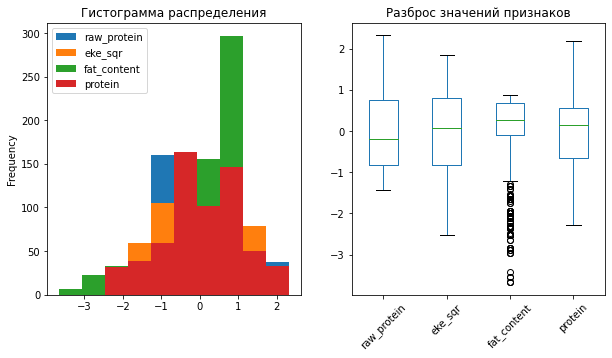

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [148]:
# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict_proba(cow_buy_log_new)[:, 1]
pred_final = (y_pred > OPT_THRESHOLD).astype(int)

print(y_pred)
print(pred_final)



[0.69543329 0.6488036  0.52852898 0.42734314 0.51046282 0.13493548
 0.69543329 0.6273792  0.52852898 0.74207444 0.24627877 0.44266872
 0.17203604 0.71145413 0.52852898 0.50585514 0.68528509 0.13074232
 0.44781415 0.51046282]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [149]:
cow_buy_mo['expected_taste_of_milk'] = pred_final
cow_buy_mo['expected_taste_of_milk'] = cow_buy_mo['expected_taste_of_milk'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')

display(cow_buy_mo)

,breed,type_of_pasture,dad_breed,dad_name,age,raw_protein,spo_category,eke_sqr,expected_milk_yield,expected_taste_of_milk
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,2019.77191,более_0.92,233.378833,6584.562078,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,менее_2_лет,2019.77191,более_0.92,233.378833,6314.585317,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,2019.77191,более_0.92,233.378833,6300.738656,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,более_2_лет,2019.77191,более_0.92,233.378833,6594.628396,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,более_2_лет,2019.77191,более_0.92,233.378833,6544.946909,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,менее_2_лет,2019.77191,более_0.92,233.378833,6371.251382,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,2019.77191,более_0.92,233.378833,6584.562078,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,более_2_лет,2019.77191,более_0.92,233.378833,6534.356462,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,2019.77191,более_0.92,233.378833,6300.738656,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,менее_2_лет,2019.77191,более_0.92,233.378833,6374.857250,вкусно


In [150]:
print('Список коров рекомендуемых к покупке')
cow_buy_mo[cow_buy_mo['expected_taste_of_milk'] == 'вкусно']

Список коров рекомендуемых к покупке


,breed,type_of_pasture,dad_breed,dad_name,age,raw_protein,spo_category,eke_sqr,expected_milk_yield,expected_taste_of_milk
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,менее_2_лет,2019.77191,более_0.92,233.378833,6374.85725,вкусно


### Вывод

Для прогноза вкуса молока коров была построена модель логистической регрессии. В качестве целевого признака был выбран 'taste_of_milk' - вкус молока.

Была проведена оценка качества модели на тестовой выборке: рассчитаны метрики accuracy, recall, precision, а также построена матрица ошибок.

Так для фермера важен вкус молока, следовательно было необходимо уменьшить количество ошибок первого уровня. Для этого мы подобрали порог классификации, так чтобы максимально уменьшить ошибки 1-го рода (FP) на валидации и тем самым увеличить precision выборки.

Было выбрано пороговое значение 0,73, при нем мы сократили количество ошибок первого рода до 5, сократив при этом число предсказанных объектов вдвое. Метрика recall при этом 0,299, но наша цель уменьшить количество ошибок первого рода, повысив precision 0,839

После изменения порога снова оценили качество модели.

Результаты изменения пороговых значений:
- количество ошибок первого рода существенно снизилось (с 43 до 5)
- метрика accuracy практически не изменилась (0.609 / 0.577)
- метрика recall сильно уменьшилась (с 0.793 до 0.299)
- метрика precision увеличилась (с 0.616 до 0.839)

С помощью обученной модели был спрогнозирован вкус молока коров «ЭкоФермы», которых фермер хочет купить.

На текущий момент, мы можем рекомендовать к покупке всего 1 корову, с предсказанным параметром молока ”Вкусное”


## Итоговые выводы

**Описание проекта**

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

**Цель проекта:** разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке.

---

**ШАГ 1 - предобработка данных**

**ferma_main:**

* Обнаружены и удалены явные дубликаты
* Название столбцов приведены к единому стиля написания:
    
    * 'Удой, кг' &#8594; 'milk_yield',
    * 'ЭКЕ (Энергетическая кормовая единица)' &#8594; 'eke',
    * 'Сырой протеин, г' &#8594; 'raw_protein',
    * 'СПО (Сахаро-протеиновое соотношение) '&#8594; 'spo',
    * 'Порода' &#8594; 'breed',
    * 'Тип пастбища' &#8594; 'type_of_pasture',
    * 'порода папы_быка' &#8594; 'dad_breed',
    * 'Жирность,%' &#8594; 'fat_content',
    * 'Белок,%' &#8594; 'protein',
    * 'Вкус молока' &#8594; 'taste_of_milk',
    * 'Возраст' &#8594; 'age',
* Типы столбцов указаны верно
* Пропущенных значений не выявленно
    
**ferma_dad**

* Явные дубликаты не обнаружены
* Название столбцов приведены к единому стиля написания:
    * 'Имя Папы' &#8594; 'dad_name'
* Типы столбцов указаны верно
* Пропущенных значений не выявленно

**cow_buy**

* Обнаружены явные дубликаты - Удалять их не будем, так как в датафрейте признаков, категорий немного - вероятность повторов ненулевая.
* Название столбцов не приведены к единому стиля написания
    * 'Порода' &#8594; 'breed',
    * 'Тип пастбища' &#8594; 'type_of_pasture',
    * 'порода папы_быка' &#8594; 'dad_breed',
    * 'Имя_папы' &#8594; 'dad_name',
    * 'Текущая_жирность,%' &#8594; 'fat_content_now',
    * 'Текущий_уровень_белок,%' &#8594; 'protein_now',
    * 'Возраст' &#8594; 'age',
* Типы столбцов указаны верно
* Пропущенных значений не выявленно

---

**ШАГ 2 - Исследовательский анализ данных**

**Таблица ferma_main, которая содержит данные о стаде фермера на текущий момент.**

- В столбце 'milk_yield' - удой, масса молока, которую корова даёт в год (в килограммах). удалили анамальное значение. После удаления аномального значения, распределение данных стало напоминать нормальное и данные варьируются в пределах от 5750 до 6500 кг. молока в год.

- В столбце eke - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы. Данные распределены нормально, ассиметрично. Аномальных значений нет. Средний показатель питательности корма коровы варьируется от 13,5 до 15,5.

- В столбце raw_protein - Сырой протеин, г — содержание сырого протеина в корме (в граммах). Данные распределены нормально, ассиметрично. Аномальных значений нет. Средний показатель содержание сырого протеина в корме варьируется от 1780 до 2070.

- В столбце spo - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы. В данных есть пропуски данных, возможно это связано со спецификой вычисления признака СПО. Аномальных значений нет. Средний показатель сотношения сахара к протеину в корме коровы варьируется от 0,89 до 0,94.

- В столбце breed - Порода — порода коровы. Представленны коровы двух видов: Вис Бик Айдиал в количестве 372 шт (59%), и РефлешнСоверинг в количестве 256 штук (41%).

- В столбце type_of_pasture - Тип пастбища — ландшафт лугов, на которых паслась корова. Обработали неявные дубликаты, заменили Равнинные на Равнинное. После замены осталось два типа ландшафта. На Холмистой местности пасутся 350 коров (56%), на равнинной 278 коровы (44%)

- В столбце dad_breed - порода папы_быка — порода папы коровы. Обработали неявные дубликаты, заменили Айдиалл на Айдиал. После замены осталось два вида пододы быков. Айдиал - 317 штук и Соверин - 311 штук. Распределение быков близко к 1:1.

- В столбце fat_content - Жирность,% — содержание жиров в молоке (в процентах). Есть выбросы (жирность менее 3,4%). Так как доля выбросов составляет 13,7% от общего количества данных, к томуже данные реалистичны, избавится от них не будем. Средний показатель содержание жиров в молоке варьируется от 3,6% до 3,7%.

- В столбце protein - Белок,% — содержание белков в молоке (в процентах). Удалены выбросы, где содержание белков в молоке менее 3,07% или более 3,081%. Оставшиеся данные распределены нормально. Средний показатель содержания белков в молоке варьируется от 3,074% до 3,077%.

- В столбце taste_of_milk - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно) два критерия вкуса молока: вкусно - 366 значений (59%) и не вкусно (41%)

- В столбце age Возраст — возраст коровы, бинарный признак (менее2лет, более2лет). Молодых коров (младше 2 лет) всего 17% (109 штук), коров постарше (более 2 лет) - 83% (514 штук)

**Таблица ferma_dad, которая хранит имя папы каждой коровы в стаде фермера.**

Главный бык осеменитель Барин на его счету 240 коров, на втором месте Буйный - 215 коров, замыкают рейтинг Соловчик и Гкркулес 110 и 64 коровы соответственно.

**Таблица cow_buy, данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.**

- В столбце **breed - Порода — порода коровы.** Коровы которые рассматривает фермер для покупки принадлежат породам Вис Бик Айдиал и РефлешнСоверинг. Причем предпочтений относительно породы у фермера нет, так как в списке их одинаковое количество.

- В столбце **dad_breed - порода папы_быка — порода папы коровы.** Самым распространенным отцом является Буйный, что вполне логично, так как он в лидерах по количеству детей. Логично бы предположить, что бык с наибольшим числом потомства должен лидировать и в этой выборке, но Барин оказался на последнем месте, это возможно в двух случаях, если барин уже стар и не может производить потомство в том объеме, что производил раньше, либо его детей очень быстро раскупают и до нашего фермера осталось всего 2 коровы. А Геркулес с наименьшим числом потомства вырвался на второе место с 5 детьми. Тут тоже может быть 2 исхода, либо его потомство не пользуется популярностью, либо он еще очень молод, и сейчас находится в своей лучшей форме, что его часто спаривают с другими коровами, поэтому количество его детей будет только расти.

- В столбце **fat_content_now - Текущая_жирность,% — содержание жиров в молоке (в процентах).**  Аномальных значений (выбросов) нет. Текущая жирность молока варьируется от 3,34% до 3,77%

- В столбце **protein_now - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).** Аномальных значений (выбросов) нет. Распределение данных нельзя назвать нормальным, так как есть пропуски, возможно это связано со спецификой вычисления содержание белков в молоке, либо потому, что данных недостаточно, что бы заполнить все значения. Текущее содержание белков в молоке варьируется от 3,046% до 3,081%

- В столбце **age - Возраст — возраст коровы, бинарный признак (менее2лет, более2лет) всего два значения более 2 лет и менее 2 лет.** Коровы, которых подобрал фермер для покупки в основном старше 2 лет (69% от всех данных). Возможно это связано с тем, что взрослые коровы дают больше молока, либо с тем, что молодых коров быстро раскупают.

---
**Шаг 3 - корреляционный анализ**

Целевой признак это удой. Опишем корреляцию с другими признаками.

* **eke - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.** Наблюдаем высокую положительную корреляцию. Коэффициент корреляции равен 0,76. От категориальных признаков зависимость остается, исключение только коровы менее двух лет, в данном случае коэффициент корреляции равен 0,22

*  **raw_protein - Сырой протеин, г — содержание сырого протеина в корме (в граммах).** Наблюдаем умеренную положительную корреляцию. Коэффициент корреляции равен 0,45. От категориальных признаков зависимость остается, исключение только коровы менее двух лет, в данном случае коэффициент корреляции равен -0,08

* **spo - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.**  Наблюдаем весьма высокую положительную корреляцию. Коэффициент корреляции равен 0,81. От категориальных признаков зависимость остается, исключение только коровы менее двух лет, в данном случае коэффициент корреляции равен 0,18

* **fat_content - Жирность,% — содержание жиров в молоке (в процентах).** Наблюдаем заметную положительную корреляцию. Коэффициент корреляции равен 0,6. От категориальных признаков зависимость остается, исключение только коровы менее двух лет, в данном случае коэффициент корреляции равен 0,09

*  **protein - Белок,% — содержание белков в молоке (в процентах).** Наблюдаем слабую положительную корреляцию. Коэффициент корреляции равен 0. От категориальных признаков зависимость остается.

Нелинейные связи.

Линейная зависимость оценивается по коэффициенту корреляции и по графику рассеивания. Не смотря на о что зависимость между целевым признаком удой и СПО (Сахаро-протеиновое соотношение) очень высокая, коэффициент корреляции равен 0,81, но из диаграммы видим что данные во-первых дискретны (расположены в столбиках, т.е. принимают конкретные значения) во-вторых расположены ступеньками, отсюда можем сделать вывод, что между удоем и признаком СПО нет линейной зависимости.

Нелинейная зависимость целевого признака удой также наблюдается с параметром белок, и с со всеми количественными признаками для коров младше 2 лет. 


Нелинейность некоторых признаков может быть связана измерением признаков. Например удой измеряется в тысячах, а СПО исчесляется в десятичных дробях и нужно будет проводить масштабирование данных.

Мультиколлинеарность.

Мультиколлинеарности между входными параметрами нет. Связь между параметрами Жирность, ЭКЕ, СПО есть, но она далеко не 1.

---

**Шаг 4 - Задача регрессии**

Для прогноза удоя молока коров были обучены и протестированы 3 модели. Из них выбрали модель с наименьшими показателями ошибок. С помощью лучшей модели спрогнозировали удой коров, которых фермер хочет купить. По условию задачи фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным. На текущий момент, мы можем рекомендовать к покупке всех коров, так как предсказанный удой у всех коров более 6000. Чтобы предсказать вкус молока нужно построить модель логистической регрессии.

---

**Шаг 5 - Задача классификации**

Для прогноза вкуса молока коров была построена модель логистической регрессии. В качестве целевого признака был выбран 'taste_of_milk' - вкус молока.

Была проведена оценка качества модели на тестовой выборке: рассчитаны метрики accuracy, recall, precision, а также построена матрица ошибок.

Так для фермера важен вкус молока, следовательно было необходимо уменьшить количество ошибок первого уровня. Для этого мы подобрали порог классификации, так чтобы максимально уменьшить ошибки 1-го рода (FP) на валидации и тем самым увеличить precision выборки.

Было выбрано пороговое значение 0,73, при нем мы сократили количество ошибок первого рода до 5, сократив при этом число предсказанных объектов вдвое. Метрика recall при этом 0,299, но наша цель уменьшить количество ошибок первого рода, повысив precision 0,839

После изменения порога снова оценили качество модели.

Результаты изменения пороговых значений:
- количество ошибок первого рода существенно снизилось (с 43 до 5)
- метрика accuracy практически не изменилась (0.609 / 0.577)
- метрика recall сильно уменьшилась (с 0.793 до 0.299)
- метрика precision увеличилась (с 0.616 до 0.839)

С помощью обученной модели был спрогнозирован вкус молока коров «ЭкоФермы», которых фермер хочет купить.

На текущий момент, **мы можем рекомендовать к покупке всего 1 корову**, с предсказанным параметром молока ”Вкусное” и удоем не менее 6000 килограммов молока в год.

**Шаг 7 - рекомендации**

Владельцу молочного хозяйства «Вольный луг» рекомендуем к покупке только 1 корову из 16 коров «ЭкоФермы».

In [151]:
print('Список коров рекомендуемых к покупке:')
cow_buy_mo[cow_buy_mo['expected_taste_of_milk'] == 'вкусно']

Список коров рекомендуемых к покупке:


,breed,type_of_pasture,dad_breed,dad_name,age,raw_protein,spo_category,eke_sqr,expected_milk_yield,expected_taste_of_milk
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,менее_2_лет,2019.77191,более_0.92,233.378833,6374.85725,вкусно


In [152]:
cow_buy_mo.expected_taste_of_milk

0     не вкусно
1     не вкусно
2     не вкусно
3     не вкусно
4     не вкусно
5     не вкусно
6     не вкусно
7     не вкусно
8     не вкусно
9        вкусно
10    не вкусно
11    не вкусно
12    не вкусно
13    не вкусно
14    не вкусно
15    не вкусно
16    не вкусно
17    не вкусно
18    не вкусно
19    не вкусно
Name: expected_taste_of_milk, dtype: object

Для построения более точной модели, можно добавить дополнительные критерии для анализа. Например:
- Вес коровы
- Была ли корова на свободном выгуле
- Месяц рождения коровы
- Болезни коровы
- Использование пробиотиков 

**Шаг 8 - выводы о моделях линейной регрессии и логистической регрессии**

***Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?***

Для прогноза удоя молока коров были обучены и протестированы 3 модели. Из них выбрали модель с наименьшими показателями ошибок. 

Во всех трех моделях закодировали категориальные признаки с помощью OneHotEncoder и масштабировали количественные признаки с помощью StandardScaler.

**Первую модель** мы мостроили на исходных данных.

**Вторая модель** мы преобразовали нелинейные признаки. Признак СПО - мы превратили в категориальный, а о нелинейности признака ЭКЕ мы избавились возведя его в квадрат.

**Третья модель** Помимо преобразования нелинейных признаков, добавили новый признак имя_папы из файла ferma_dad

Далее сравнили показатели ошибок. И  для прогноза удоя молока коров выбрали модель с наименьшими показателями ошибок.

---
***Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?***

Полученные регрессионные модели показывают неплохие результаты:

**модель линейной регрессии**

Лучшая модель - третья. В среднем ошибается на 185,9 кг удоя молока.

MSE третьей модели: 34804.19
MAE третьей модели: 146.46
RMSE третьей модели: 186.56
доверительный квантильный интервал для третьей модели: (5711.44 , 6470.25)
доверительный 95% интервал для третьей модели (6000.05, 6140.43)

**модель логистической регрессии**

accuracy: 0.577
recall: 0.299
precision: 0.839

Для улучшения результатов моделей мы уже использовали некоторые способы улучшения: убрали нелинейность, добавили новые признаки.

В любом случае всегда есть куда стремиться. Например, можно добавить новые признаки для анализа, из предложенных в рекомендациях, или построить новые модели